## 1. Baseline calculation: ``Standard" GV-rates for weight-constrained GV codes

Given an $nw$ weight-constrained bit-flip AVC for which we wish to construct codes with minimum distance $\delta n$, the joint types between $\underline{x}$ and $\underline{x}'$ (both codewords of Hamming weight $nw$) is in general given by

$$\begin{bmatrix} T_{x,x'}(0,0) & T_{x,x'}(0,1)\\ T_{x,x'}(1,0) & T_{x,x'}(1,1)  \end{bmatrix}$$.

It's known that the GV-rate for this is given by $$\max_{p_x \in \lambda_x} \min_{p_{x,x'} \in {\cal K}} I(X;X')$$
Here ${\cal K}$ corresponds to all confusable/symmetrizable joint-types. For the weight-constrained bit-flip setting, the maximizing $p_x$ clearly occurs at the extremal type $(1-w,w)$. The corresponding minimizing $p_{x,x'}$ corresponds to joint types where $T_{x,x'}(0,1)+ T_{x,x'}(1,0) = \delta$ (see 3. below).

Additionally, we have the following constraints on these entries:

1. The marginals of $x$ and $x'$ both correspond to the type $(1-w,w)$, hence we have the equations $$T_{x,x'}(1,0) + T_{x,x'}(1,1) = w$$ and $$T_{x,x'}(0,1) + T_{x,x'}(1,1) = w$$.

2. Since the entries of the matrix form a p.m.f., hence $$T_{x,x'}(0,0) + T_{x,x'}(0,1) + T_{x,x'}(1,0) + T_{x,x'}(1,1) = 1$$

3. To compute the GV-rate we should restrict ourselves to symmetrizable types. This means $$T_{x,x'}(1,0) + T_{x,x'}(1,0) = \delta$$.

Solving these gives us that the extremizing joint-type is

$$T^* = \begin{bmatrix} 1-w - \frac{\delta}{2} & \frac{\delta}{2}\\ \frac{\delta}{2} & w - \frac{\delta}{2}  \end{bmatrix}$$.

By the above the GV rate is given by the mutual information corresponding to this joint-type, which equals

$$ R_{GV}(w,\delta) = \left ( 1-w - \frac{\delta}{2} \right )\log \left ( \frac{1-w - \frac{\delta}{2}}{(1-w)^2}\right ) + 2\left ( \frac{\delta}{2} \right )\log \left ( \frac{\frac{\delta}{2}}{w(1-w)}\right ) + \left ( w - \frac{\delta}{2} \right )\log \left ( \frac{w - \frac{\delta}{2}}{w^2}\right )
$$

This can be simplifed (assuming my algebra is correct) as

$$R_{GV}(w,\delta) = 2H(w) - H(T^*)$$.

As a sanity check, when $\delta = 2w(1-w)$ (corresponding to the Plotkin point of the weight-constrained setting),

$$T^*(w, 2w(1-w)) = \begin{bmatrix} (1-w)^2  & w(1-w)\\ w(1-w) & w - w^2  \end{bmatrix},$$

hence $H(T^*(w,  2w(1-w))) = 2H(w)$, and hence the weight-constrained GV-rate $R_{GV}(w,2w(1-w))$  equals zero.

Finally, to begin with, we'll focus our attention on the setting where $\delta = w $ (note that for $w < 1/2$, this choice of $\delta$ is lower than the Plotkin point $2w(1-w)$. In this case the GV-rate, which equals  

$$R_{GV}(\delta,\delta) = 2H(\delta) - H\left (1-\frac{3\delta}{2},\frac{\delta}{2},\frac{\delta}{2},\frac{\delta}{2} \right )$$
is positive, as (just for a sanity-check) plotted below.

***
Mike: I did an independent GV calculation for weight $\delta$ and distance $\delta n$:

$$R_{GV}(\delta,\delta) = H(\delta) - \delta - (1-\delta)H(\delta/2(1-\delta))$$

I checked ... these are the same.

Yihan: I agree with the expression of $R_{GV}(w,\delta)$ (and have derived this before). This was originally proved by Levenshtein. See Eqn. (2) here https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.136.6304&rep=rep1&type=pdf.
***

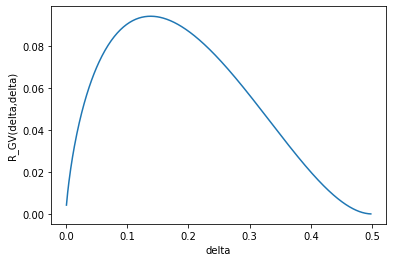

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import entropy

x_data=np.arange(0.001,0.499,0.001)
y_data=np.arange(0.001,0.499,0.001)
z_data=np.arange(0.001,0.499,0.001)

i = 0
for item in x_data:
  # Mike's function
  # z_data[i] = entropy([x_data[i],1-x_data[i]],base=2) - x_data[i]-(1-x_data[i])*entropy([x_data[i]/(2*(1-x_data[i])),1-x_data[i]/(2*(1-x_data[i]))],base=2)
  # Sid's function
  y_data[i] = 2*entropy([x_data[i],1-x_data[i]],base=2) - entropy([1-1.5*x_data[i],0.5*x_data[i],0.5*x_data[i],0.5*x_data[i]], base=2)
  # z_data[i] = entropy([1-1.5*x_data[i],0.5*x_data[i],0.5*x_data[i],0.5*x_data[i]], base=2) - 3*entropy([x_data[i],1-x_data[i]],base=2) + entropy(3*delta)
  i = i+1

fig = plt.figure()
plt.plot(x_data, y_data, color='tab:blue')
plt.xlabel("delta")
plt.ylabel("R_GV(delta,delta)")
plt.show()

## 2. A curious observation regarding ``standard" weight-unconstrained GV codes.

In the usual constructions of a weight-unconstrained GV code with minimium distance $\delta n$, for any $\varepsilon > 0$, a rate $1-H(\delta)-\varepsilon$ can be attained. So the average number of codewords in Hamming balls of radius $n\delta$ (averaged over all possible $2^n$ centres) is considerably less than $1$, equaling $2^{-\varepsilon n}$.

This is in stark constrast to the average number of codewords (also satisfying the property that all pairs have a Hamming distance of at least $\delta n$ for weight-constrained codes with Hamming weight constraint also equaling $\delta n$). As argued/plotted above, the weight-constrained GV-code setting leads to a much denser packing, with an exponential number of codewords, equaling $2^{nR_{GV}(\delta,\delta)}$

So, this leads naturally to the following optimistic thought -- if we were to try to construct a weight-unconstrained code ${\cal C}$ with mininum distance $\delta n$, somehow "stitched" out of building blocks comprising of $\delta n$-weight-constained $\delta n$-minimum distance codes, can we actually beat the standard GV bound of $1-H(\delta)$? That ambitious goal is what we attempt below.

## 3. Proposed construction

The observation above gives a starting point, but we have to figure out how to preserve (as much as possible) the local structure of the weight-constrained GV codes, while combining them globally.

The proposed scheme is to use a superposition-type scheme, with expurgation.

1. First, we construct a collection of $2^{n(1-H(\delta)-\varepsilon)}$ cloud centres. For this we just use a classical weight-unconstrained GV codes, with each cloud centre chosen uniform at random from $\{0,1\}^n$, and then expurgated to ensure a minimum distance of $\delta n$ between all pairs of cloud centres. Unlike the "usual" random GV construction, these cloud centres will not be selected as codewords themselves, but rather as a "skeleton" over which the codewords can be draped.

2. Next, in the Hamming ball ${\cal B}_{H}(\underline{c}_i,n\delta)$ around each cloud centre $\underline{c}_i$, we construct a (random) $\delta n$-weight constrained code ${\cal C}(i)$ of rate $2^{nR_s}$. These codewords will be called the satellite codewords for cloud centre $\underline{c}_i$. Here $R_s \in [\varepsilon,R_{GV}(\delta,\delta)-\varepsilon]$ is a design parameter to be chosen later.

3. In the union $\cup_{i=1}^{2^{n(1-H(\delta)+\varepsilon)}} {\cal C}(i)$, we then expurgate to remove all codewords that are closer than $n \delta$ to some other codeword (either within the same cloud, or across clouds).


**Remark 1**: If, after expurgation, each cloud still has a positive-rate sub-code (these expurgated sub-codes may be substantially smaller than $2^{nR_{GV}(\delta,\delta)}$ -- all that's required to beat the GV bound is rate-positivity of ``typical" expurgated sub-codes).

**Remark 2**: In the above, while we've already fixed $w = \delta$ since that's a natural choice of parameters for this attempt (because of the average density observations made above), if the attempt with this choice of parameters works, potentially other parameters could be even better.

**Remark 3**: Why is it at all plausible that this might work? Let's do a thought-experiment where two cloud centres $\underline{c} = \underline{c}'$ are identical. Note that this is actually excluded from happening by our requirement 1. above, which ensures that pairs of cloud centres are at least $\delta n$-separated, but just for this thought experiment, the scanrio when $\underline{c} = \underline{c}'$ are identical is the case where the satellite codewords of $\underline{c}'$ cause the maximum amount of expurgation of the satlellite codewords of $\underline{c}$ (and vice versa), since the clouds are identical. However, even in this case, satellite codes of rate $R_{GV}(\delta,\delta)-\varepsilon$ still exist w.h.p. since the union of these two sets of satellite codewords is just another set of double the size (and hence still essentially the same rate), so in expectation the expurgation factor is at most 1/2.
When $\underline{c}, \underline{c}'$ are (at least) $\delta n$ separated, then intuitively the expurgation factor should be much (exponentially) smaller. On the other hand (and this is where the tension comes in, and why calculation is required), there are many $ \underline{c}'$ whose satellite codewords might cause expurgation. So even though any given $ \underline{c}'$ will be expurgating only an exponentially small fraction of the satellite codewords of $\underline{c}$, one has to worry about the cumulative effect of all these expurgations.

## 4. Analysis

Without loss of generality, let one cloud-centre be $\underline{c} = \underline{0}$. (We'll try to calculate the expected number of satellite codewords suriviving expurgation relative to this cloud centre -- exactly the same calculations should hold for any other cloud centre.)

Let $\underline{x}(\underline{c})$ be a satellite codeword of $\underline{c}$.

Let $\underline{c}'(\Delta,\Delta')$ be another cloud centre at distance $n \Delta $ from $\underline{c}$, and at distance $n \Delta' $ from $\underline{x}(\underline{c})$.
Note that this uniquely fixes the joint type $T(\underline{c},\underline{x}(\underline{c}),\underline{c}'(\Delta,\Delta'))$ of $\underline{c},\underline{x}(\underline{c}),\underline{c}'(\Delta,\Delta')$.

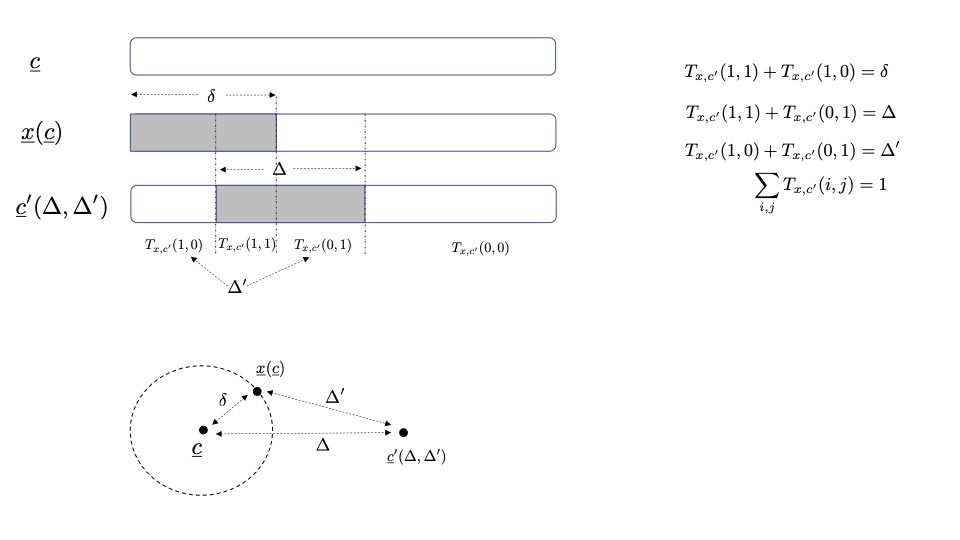

![](https://drive.google.com/file/d/10Blu0EMQF2kXgWsh8e_ziwhFfYnto32l/view?usp=sharing)




Solving the equations above we get
$$\begin{eqnarray}
T_{x,c'}(1,1) & = &\frac{\delta + \Delta - \Delta'}{2}\\
T_{x,c'}(0,1) &= &\frac{\Delta + \Delta'-\delta}{2}\\
T_{x,c'}(1,0) &= &\frac{\delta + \Delta'-\Delta}{2}\\
T_{x,c'}(0,0) &= &1-\left (\frac{\delta + \Delta'+\Delta}{2} \right )
\end{eqnarray}$$

We denote this joint type $T^{\Delta,\Delta'}_{x,c'}$, or sometimes just $T_{x,c'}$ for short.

**Remark**: Note that since w.l.o.g. we assumed $\underline{c} = \underline{0}$ (or equivalently that we subtract out the vector $\underline{c}$ from all the other vectors), therefore its components play no role in the joint types/entropies, etc calculated above and below. (One needs to convince oneself that the conditional distributions of the remaining random variables remain the same under this subtraction, but this is indeed the case.) This leads to a slightly simplified calculation, since there're fewer parameters to examine.

By standard fractional volume arguments, with high probability (over the random construction of the cloud centres), there are about $\frac{2^{n(H(C'|X,C)}}{2^n}2^{nR} = \frac{2^{n(H(C'|X)}}{2^n}2^{nR} = \exp(n(H(C'|X)-H(\delta)))$ such $\underline{c}'(\Delta,\Delta')$. The parameter regime of interest has the following constraints:

1. $\Delta \in [\delta,3\delta]$. (The reason for the lower bound is that if $\Delta < \delta$, then by construction there are no such cloud centres; the upper bound is $3\delta$ since if $\Delta > 3\delta$, by the triangle inequalilty, any satelite codeword codeword of such a $\underline{c}'(\Delta,\Delta')$ cannot cause expurgation of any satellite codeword of $\underline{c}$, hence such $\underline{c}'(\Delta,\Delta')$ ``do not matter".

2. $\Delta' \in [\Delta-\delta,2\delta]$. The lower bound follows from the triangle inequality applied to the figure above, implying that $\delta + \Delta' \geq \Delta$. The upper bound arises from the fact that if $\underline{c}'(\Delta,\Delta')$ is more than $2n\delta$ from $\underline{x}$ then none of the satellite codewords of $\underline{c}'(\Delta,\Delta')$ can cause expurgation of $\underline{x}$.

3. $H(C'|X)>H(\delta) \Leftrightarrow H(C',X)-H(X)>H(\delta) \Leftrightarrow H(C',X)>2H(\delta)$: This inequality is a consequence of the fact that the number of $\underline{c}'(\Delta,\Delta')$ is $\exp(n(H(C'|X)-H(\delta)))$, and for any $\underline{c}'(\Delta,\Delta')$ to cause expurgation of $\underline{x}$,  there must be a measurable number of them.

So now, for a given $\delta$, we compute the set of $(\Delta,\Delta')$ pairs of interest (after which we'll have to introduce one more final random variable into the mix).

delta =  0.01


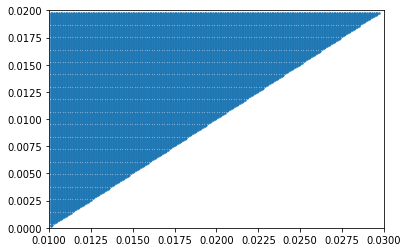

The plot above shows the (Delta, Delta') pairs satisfying constraints 1 and 2 above


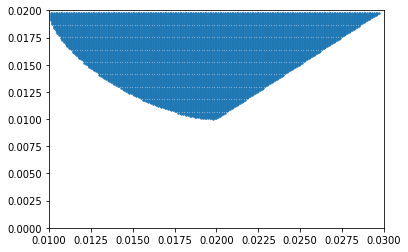

The plot above shows the (Delta, Delta') pairs satisfying constraints 1, 2, and 3 above


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import entropy

delta = 0.01
entdelta = entropy([delta,1-delta], base=2)

table1 = []
table2 = []

step_size_del = 0.0001
step_size_delp = 0.0001
num_del_steps = round(2*delta/step_size_del)-2

for i in range(num_del_steps):
  Delta = delta + (i+1)*step_size_del
  num_delp_steps = round((3*delta-Delta)/step_size_delp)-2
  for j in range(num_delp_steps):
    Deltap = Delta-delta + (j+1)*step_size_delp
    T11 = (delta + Delta - Deltap)/2
    T01 = (Delta + Deltap- delta)/2
    T10 = (delta + Deltap-Delta)/2
    T00 = 1-(delta + Deltap +Delta)/2
    ent_typ = entropy([T00,T01,T10,T11],base=2)
    table1.append([Delta,Deltap])
    if ent_typ > 2*entdelta:
      table2.append([Delta,Deltap])

print("delta = ",delta)

xs = [x[0] for x in table1]
ys = [x[1] for x in table1]
plt.scatter(xs, ys,s=2)
plt.xlim([delta, 3*delta])
plt.ylim([0, 2*delta])
plt.show()

print("The plot above shows the (Delta, Delta') pairs satisfying constraints 1 and 2 above")

xs = [x[0] for x in table2]
ys = [x[1] for x in table2]
plt.scatter(xs, ys,s=2)
plt.xlim([delta, 3*delta])
plt.ylim([0, 2*delta])
plt.show()

print("The plot above shows the (Delta, Delta') pairs satisfying constraints 1, 2, and 3 above")


So far we've put constraints on $\underline{c}$, $\underline{x}$, and $\underline{c}'$. But there's another vector of natural interest which can help further constrain the problem. In particular, $\underline{x}$ will be expurgated if and only if there's a corresponding $\underline{x}'$ that's "sufficiently close".
**bold text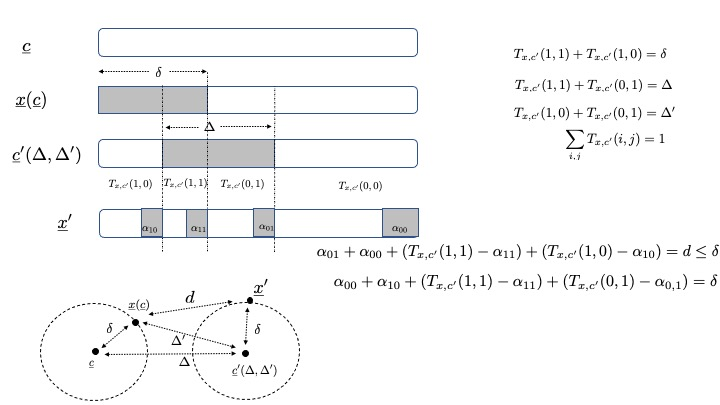**



For the proposed code construction, let ${p}^{\Delta,\Delta'}_{X'|XC'} $ be a vector whose components we parameterize so that $p^{\Delta,\Delta'}_{X',X,C'}(x'=1,x=i,c' = j) = \alpha_{ij}$. A given $4$-tuple $p^{\Delta,\Delta'}_{X'|XC'} $ will
be called "$\underline{x}$-close" if

a) $ \alpha_{01} + \alpha_{00} +  (T_{x,c'}(1,1)-\alpha_{11})+(T_{x,c'}(1,0) -\alpha_{10} ) \leq \delta$,
* This corresponds to the condition that codewords $\underline{x}'$ falling in such a conditional type $p^{\Delta,\Delta'}_{X'|XC'} $  would cause expurgation of $\underline{x}$.

**Remark**: Actually, in a) above, I think (**check**) due to convexity the worst (largest) type-class will correspond to the equality condition -- see below. If equality suffices then might be a bit easier to program up.

and

b) $\alpha_{00} + \alpha_{10} + (T_{x,c'}(1,1)-\alpha_{11})+(T_{x,c'}(0,1) -\alpha_{0,1} ) = \delta$
* This corresponds to the $\underline{x}'$ itself being a satellite codeword of $\underline{c}'$.

Let $${\cal S}(\Delta,\Delta') = \{p^{\Delta,\Delta'}_{X'|XC'}: p^{\Delta,\Delta'}_{X'|XC'} \mbox{ is $\underline{x}$-close, given that the joint type of $\underline{x}$ and $\underline{c}'$ equals } T^{\Delta,\Delta'}_{x,c'}\}$$ be the set of all $\underline{x}$-close conditional distributions.

Let $\hat{p}^{\Delta,\Delta'}_{X'|XC'}$ be the conditional distribution in ${\cal S}(\Delta,\Delta')$ such that the conditional entropy is maximized, i.e.,

$$\hat{p}^{\Delta,\Delta'}_{X'|XC'} = \arg\max_{p^{\Delta,\Delta'}_{X'|XC'} \in {\cal S}(\Delta,\Delta')} H(X'|XC')$$

With these definitions at hand:

* The probability that a codeword $\underline{x}$ is expurgated due to some codeword $\underline{x}'$ falling into the conditional type class ${\cal T}(X'|\underline{X} = \underline{x},\underline{C}' = \underline{c}')$ (with conditional distribution $\hat{p}^{\Delta,\Delta'}_{X'|XC'}$, which is the exponentially likeliest $\underline{x}$-close type-class for a given $\underline{c}'$) equals $$\frac{2^{nH(X'|XC')}}{2^{nH(\delta)}} 2^{nR_s} $$

**Remark**: The fractional volume $\frac{2^{nH(X'|XC')}}{2^{nH(\delta)}}$ can also be thought of as $2^{-n(I(X;X',C))}$

* Since there are $\frac{2^{nH(C'|X)}}{2^n}2^{n(1-H(\delta))} = 2^{n(H(C'|X)-H(\delta))}$ different $\underline{c}'$ with joint type $T^{\Delta,\Delta'}_{x,c'}$ w.r.t. a given $\underline{c}'$, therefore the probability that a codeword $\underline{x}$ is expurgated due to some codeword $\underline{x}'$ falling into ANY conditional type class ${\cal T}(X'|\underline{X} = \underline{x},\underline{C}' = \underline{c}')$ for some $\underline{c}'$ with joint type $T^{\Delta,\Delta'}_{x,c'}$ is then

$$\frac{2^{nH(X'|XC')}}{2^{nH(\delta)}} {2^{nR_s}} . 2^{n(H(C'|X)-H(\delta))}$$

Clearly, this quantity is less than $1$ iff $$2H(\delta) - H(C'|X) > H(X'|XC') + R_s$$

Note that any positive satellite codeword rate $R_s$ would imply an achievable rate greater than $1-H(\delta)$, since there are already $2^{n(1-H(\delta))}$ cloud centres, and the total number of codewords equals the number of cloud centres times the number of satellite codewords per cloud centre. So, this leads us to condition 4.

4. The scheme attains rate greater than $1-H(\delta)$ if for all $(\Delta,\Delta')$ satisfying 1., 2., and 3. above, if $$2H(\delta) - H(C'|X) > H(X'|XC')$$ (conditional entropies calculated according to according to the joint distribution $\hat{p}^{\Delta,\Delta'}_{X'|XC'}T^{\Delta,\Delta'}_{x,c'}$ described above). In particular the version of the scheme in this document attains rate

$$ \min_{(\Delta,\Delta') \mbox{ satisfying } 1.,2.,3.} 1-H(\delta) + \left [2H(\delta) - H(C'|X) - H(X'|XC')\right ]$$

**Remark:** Since $H(X) = H(\delta)$, therefore by the chain rule
$$2H(\delta) - H(C'|X) - H(X'|XC') = 3H(\delta) - H(XC'X')$$

*** Mike: up to here.


DANG -- THE CODE BELOW DOESN'T WORK BECAUSE OF NUMERICAL STABILITY ISSUES :-/

THINGS TO TRY --
* REPARAMETRIZE INTO FEWER (TWO) VARIABLES
* TRY OTHER PACKAGES (MYSTIC?)
* TRY METHODS OTHER THAN SLSQP
* TRY LAGRANGE OPTIMIZATION FOR THE MINIMIZING ENTROPY


In [ ]:
from numpy.lib.function_base import append
import numpy as np
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import math
from scipy.stats import entropy

delta = 0.01
Delta = 0.018
Deltap = 0.012
#The values above are an example of values that satisfy constraints 1, 2, and 3

T11 = (delta + Delta - Deltap)/2
T01 = (Delta + Deltap- delta)/2
T10 = (delta + Deltap-Delta)/2
T00 = 1-(delta + Deltap +Delta)/2

entdel = entropy([delta,1-delta],base=2)
entxcp = entropy([T00,T01,T10,T11],base = 2)

# initial guesses
pxcxp0 = [delta/8,delta/8,delta/8,delta/8,delta/8,delta/8,delta/8,delta/8]

def objective(x):
    return 3*entdel-entropy(x,base=2)

def constraint00(x):
    return x[0]+x[1]-T00
# alpha00 = x[1]
con00 = {'type': 'eq', 'fun': constraint00}

def constraint01(x):
    return x[2]+x[3]-T01
# alpha01 = x[3]
con01 = {'type': 'eq', 'fun': constraint01}

def constraint10(x):
    return x[4]+x[5]-T10
# alpha10 = x[5]
con10 = {'type': 'eq', 'fun': constraint10}

def constraint11(x):
    return x[6]+x[7]-T11
# alpha11 = x[7]
con11 = {'type': 'eq', 'fun': constraint11}

def constraintxpwt(x):
    return x[1] + x[5] + x[6] +x[2] - delta
#\alpha_{00} + \alpha_{10} + (T_{x,c'}(1,1)-\alpha_{11})+(T_{x,c'}(0,1) -\alpha_{0,1} ) = \delta
conwt = {'type': 'eq', 'fun': constraintxpwt}

def constraintxpdistx(x):
    return  delta - (x[3] + x[1] + x[6] +x[4])
# \alpha_{01} + \alpha_{00} +  (T_{x,c'}(1,1)-\alpha_{11})+(T_{x,c'}(1,0) -\alpha_{10} ) \leq \delta
condist = {'type': 'eq', 'fun': constraintxpwt}


# optimize
bnds = ((0,T00),(0,T00),(0,T01),(0,T01),(0,T10),(0,T10),(0,T11),(0,T11))
cons = ([con00,con01,con10,con11,conwt,condist])
solution = minimize(objective,pxcxp0,method='SLSQP',bounds=bnds, constraints=cons)

print(solution)


     fun: -2.7576205923122665
     jac: array([0.00075248, 0.00075248, 0.00075248, 0.00075248, 0.00075248,
       0.00075248, 0.00075248, 0.00075248])
 message: 'Singular matrix C in LSQ subproblem'
    nfev: 10
     nit: 1
    njev: 1
  status: 6
 success: False
       x: array([0.00125, 0.00125, 0.00125, 0.00125, 0.00125, 0.00125, 0.00125,
       0.00125])


For given $\delta, \Delta, \Delta'$, let's try setting it up as a constrained optimization problem with as few free variables as possible, and then Lagrange optimization. Done below

For given $\delta, \Delta, \Delta'$, let's try setting it up as a constrained optimization problem with as few free variables as possible, and then KKT conditions. Done below

For a given $\delta,\Delta,\Delta'$ triple, let's define the parameters:
$$\begin{eqnarray}
T_{11} &=& (\delta + \Delta - \Delta')/2\\
T_{01} &=& (\Delta + \Delta'- \delta)/2\\
T_{10} &=& (\delta +\Delta'-\Delta)/2\\
T_{00} &=& 1-(\delta + \Delta' +\Delta)/2
\end{eqnarray}$$

Among the set of variables $\underline{p}_{XC'X'} = p_{000},p_{001},p_{010},p_{011},p_{100},p_{101},p_{110},p_{111}$, we now reduce the number of free variables by using the relations

$$\begin{eqnarray}
p_{001} &=& T_{00}-p_{000}\\
p_{011} &=& T_{01}-p_{010}\\
p_{101} &=& T_{10}-p_{100}\\
p_{111} &=& T_{11}-p_{110}
\end{eqnarray}$$


**Free Variables** $p_{000},p_{010},p_{100},p_{110}$.

**Function to be maximized**
$$H(\underline{p}_{XC'X'}) = -p_{000}\ln(p_{000})-(T_{00}-p_{000})\ln(T_{00}-p_{000})-p_{010}\ln(p_{000})-(T_{01}-p_{010})\ln(T_{01}-p_{010})-p_{100}\ln(p_{100}) -(T_{10}-p_{100})\ln(T_{10}-p_{100}) - p_{110}\ln(p_{110})- (T_{11}-p_{110})\ln(T_{11}-p_{110})$$

**Remarks**:

1. Since it's just a constant scaling factor, for the purposes of optimization we'll maximize the entropy function measured in nats (base $e$) rather than bits. This'll make differntiation a bit cleaner, with no constant factor floating around.

2. Note that the function being maximized is concave and smooth.

We then have a single inequality constraint and a single equality constraint.

**Inequality constraint:**

The fact that $d_H(\underline{x},\underline{x}') \leq \delta n $ means that
$$ p_{001} + p_{011} +p_{100} +p_{110} \leq \delta, $$ which in terms of the free variables translates to
$$ (T_{00} - p_{000}) + (T_{01}-p_{010}) + p_{100} +p_{110} \leq \delta.$$
So the $g(\cdot) \leq 0$ constraint in this case equals
$$ g(p_{000},p_{010},p_{100},p_{110}) =  (T_{00} - p_{000}) + (T_{01}-p_{010}) + p_{100} +p_{110} - \delta \leq 0$$

**Equality constraint:**

The fact that $d_H(\underline{c}',\underline{x}') = \delta n $ means that
$$ p_{010} + p_{110} +p_{001} +p_{101} = \delta, $$ which in terms of the free variables translates to
$$ p_{010} + p_{110} + (T_{00} - p_{000}) + (T_{10}-p_{100}) = \delta.$$
So the $h(\cdot)$ function in this case equals
$$ h(p_{000},p_{010},p_{100},p_{110}) =  p_{010} + p_{110} + (T_{00} - p_{000}) + (T_{10}-p_{100}) - \delta = 0$$


KKT conditions (necessary conditions)

Suppose that the objective function $f : \mathbb{R}^n \rightarrow \mathbb{R}$ and the constraint function $g : \mathbb{R}^n \rightarrow \mathbb{R}$ and $h : \mathbb{R}^n \rightarrow \mathbb{R}$ continuously differentiable at a point $x^* \in \mathbb{R}^n$. If $x^*$ is a local optimum and the optimization problem has only affine constraints (LCQ: Linear Constraint Qualification), then there exist constants $\mu$ and $\lambda$, called KKT multipliers, such that the following four groups of conditions hold:


**Stationarity**

For maximizing $f(x)$: $-\nabla f(x^*) + \mu \nabla g(x^*) +  \lambda \nabla h(x^*) = \mathbf 0$

For our problem, this results in the following four equations:

1.

\begin{eqnarray}
\frac{\partial}{\partial p_{000}} \left [p_{000}\ln(p_{000})+(T_{00}-p_{000})\ln(T_{00}-p_{000}) - \mu p_{000} - \lambda p_{000} \right ] = 0\\
\Rightarrow \ln \left ( \frac{p_{000}}{T_{00}-p_{000}}\right ) - \mu - \lambda = 0 \\
\Leftrightarrow \frac{T_{00}-p_{000}}{p_{000}} =e^{-\mu - \lambda}\\
\Leftrightarrow \frac{T_{00}}{p_{000}} =1+e^{-\mu - \lambda}
\end{eqnarray}
Hence
$$p_{000} = \frac{T_{00}}{1+e^{-\mu - \lambda}},~~p_{001} = \frac{T_{00}e^{-\mu - \lambda}}{1+e^{-\mu - \lambda}}$$


2. \begin{eqnarray}
\frac{\partial}{\partial p_{010}} \left [p_{010}\ln(p_{010})+(T_{01}-p_{010})\ln(T_{01}-p_{010}) - \mu p_{010} + \lambda p_{010} \right ] = 0\\
\Rightarrow \ln \left ( \frac{p_{010}}{T_{01}-p_{010}}\right ) - \mu + \lambda = 0 \\
\Leftrightarrow \frac{T_{01}-p_{010}}{p_{010}} =e^{-\mu + \lambda}\\
\Leftrightarrow \frac{T_{01}}{p_{010}} =1+e^{-\mu + \lambda}
\end{eqnarray}
Hence
$$p_{010} = \frac{T_{01}}{1+e^{-\mu + \lambda}},~~p_{011} = \frac{T_{01}e^{-\mu + \lambda}}{1+e^{-\mu + \lambda}}$$


3.

\begin{eqnarray}
\frac{\partial}{\partial p_{100}} \left [p_{100}\ln(p_{100})+(T_{10}-p_{100})\ln(T_{10}-p_{100}) + \mu p_{100} - \lambda p_{100} \right ] = 0\\
\Rightarrow \ln \left ( \frac{p_{100}}{T_{10}-p_{100}}\right ) + \mu - \lambda = 0 \\
\Leftrightarrow \frac{T_{10}-p_{100}}{p_{100}} =e^{\mu - \lambda}\\
\Leftrightarrow \frac{T_{10}}{p_{100}} =1+e^{\mu - \lambda}
\end{eqnarray}
Hence
$$p_{100} = \frac{T_{10}}{1+e^{\mu - \lambda}},~~p_{101} = \frac{T_{10}e^{\mu - \lambda}}{1+e^{\mu - \lambda}}$$

4.

\begin{eqnarray}
\frac{\partial}{\partial p_{110}} \left [p_{110}\ln(p_{110})+(T_{11}-p_{110})\ln(T_{11}-p_{110}) + \mu p_{110} + \lambda p_{110} \right ] = 0\\
\Rightarrow \ln \left ( \frac{p_{110}}{T_{11}-p_{110}}\right ) + \mu + \lambda = 0 \\
\Leftrightarrow \frac{T_{11}-p_{110}}{p_{110}} =e^{\mu + \lambda}\\
\Leftrightarrow \frac{T_{11}}{p_{110}} =1+e^{\mu + \lambda}
\end{eqnarray}
Hence
$$p_{110} = \frac{T_{11}}{1+e^{\mu + \lambda}},~~p_{111} = \frac{T_{11}e^{\mu + \lambda}}{1+e^{\mu + \lambda}}$$



**Primal feasibility**
$$g(x^*) \le 0$$
$$h(x^*) = 0 $$
To be checked by the code below

**Dual feasibility**
$$\mu_i \ge 0, \text{ for } i = 1, \ldots, m$$
To be checked by the code below

**Complementary slackness**
$$\sum_{i=1}^m \mu_i g_i (x^*) = 0.$$
To be checked by the code below

The necessary conditions are sufficient for optimality if the objective function $f$ is a concave function, the inequality constraints $g_{j}$ are continuously differentiable convex functions and the equality constraints $h_{i}$ are affine functions. All of this is true for our optimization problem. And since $f$ is strictly concave, the local maximum of the entropy function is the global maximum.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import entropy

delta = 0.01
Delta = 0.03
Deltap = 0.02
entdelta = entropy([delta,1-delta], base=2)

T11 = (delta + Delta - Deltap)/2
T01 = (Delta + Deltap- delta)/2
T10 = (delta + Deltap-Delta)/2
T00 = 1-(delta + Deltap +Delta)/2

#print("T00,T01,T10,T11=",T00,T01,T10,T11)
from scipy.optimize import fsolve
def func(x):
    return [T00*np.exp(-x[0] -x[1])/(1+np.exp(-x[0] -x[1])) + T01/(1+np.exp(-x[0] +x[1])) + T10*np.exp(x[0] - x[1])/(1+np.exp(x[0] -x[1])) + T11/(1+np.exp(x[0] +x[1]))- delta,
            T00*np.exp(-x[0] -x[1])/(1+np.exp(-x[0] -x[1])) + T01*np.exp(-x[0] +x[1])/(1+np.exp(-x[0] +x[1])) + T10/(1+np.exp(x[0] -x[1])) + T11/(1+np.exp(x[0] +x[1]))- delta]
root = fsolve(func, [1,1])
x = root
p000 = T00/(1+np.exp(-x[0] -x[1]))
p001 = T00*np.exp(-x[0] -x[1])/(1+np.exp(-x[0] -x[1]))
p010 = T01/(1+np.exp(-x[0] +x[1]))
p011 = T01*np.exp(-x[0] +x[1])/(1+np.exp(-x[0] +x[1]))
p100 = T10/(1+np.exp(x[0] -x[1]))
p101 = T10*np.exp(x[0] -x[1])/(1+np.exp(x[0] -x[1]))
p110 = T11/(1+np.exp(+x[0] +x[1]))
p111 = T11*np.exp(x[0] +x[1])/(1+np.exp(x[0] +x[1]))
pvec = [p000,p001,p010,p011,p100,p101,p110,p111]
#print(sum(pvec))
#print(p001+p010+p101+p110 - delta)
#print(p001+p011+p100+p110 - delta)
entgap = 3*entropy([delta,1-delta],base=2) - entropy(pvec,base=2)
print(pvec)
print(entgap)
print(x)

[0.97, 4.428601256103671e-19, 0.01, 0.01, 0.0, 0.0, 4.565568305261517e-21, 0.01]
0.0004386748345226177
[21.11528688 21.11528688]


delta =  0.01


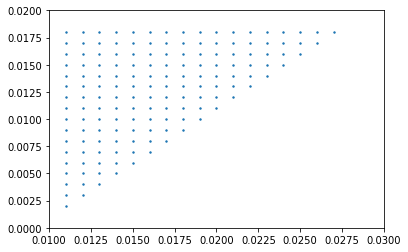

The plot above shows the (Delta, Delta') pairs satisfying constraints 1 and 2 above


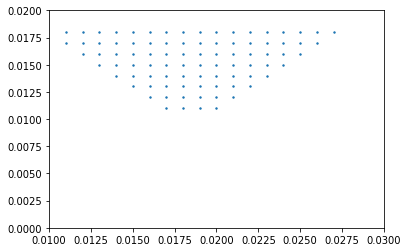

The plot above shows the (Delta, Delta') pairs satisfying constraints 1, 2, and 3 above


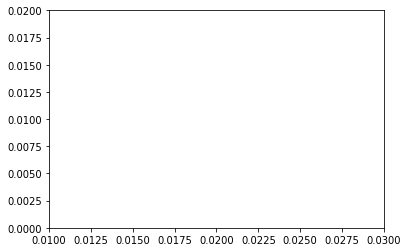

The plot above shows the (Delta, Delta') pairs for which the adversary can force a rate of no higher than 1-H(delta) -- if it is empty, that indicates success!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import entropy
from scipy.optimize import fsolve


delta = 0.01
entdelta = entropy([delta,1-delta], base=2)

def func(x):
    return [T00*np.exp(-x[0] -x[1])/(1+np.exp(-x[0] -x[1])) + T01/(1+np.exp(-x[0] +x[1])) + T10*np.exp(x[0] - x[1])/(1+np.exp(x[0] -x[1])) + T11/(1+np.exp(x[0] +x[1]))- delta,
            T00*np.exp(-x[0] -x[1])/(1+np.exp(-x[0] -x[1])) + T01*np.exp(-x[0] +x[1])/(1+np.exp(-x[0] +x[1])) + T10/(1+np.exp(x[0] -x[1])) + T11/(1+np.exp(x[0] +x[1]))- delta]


table1 = []
table2 = []
table3 = []
table4 = []

step_size_del = 0.001
step_size_delp = 0.001
num_del_steps = round(2*delta/step_size_del)-2

for i in range(num_del_steps):
  Delta = delta + (i+1)*step_size_del
  num_delp_steps = round((3*delta-Delta)/step_size_delp)-2
  for j in range(num_delp_steps):
    Deltap = Delta-delta + (j+1)*step_size_delp
    T11 = (delta + Delta - Deltap)/2
    T01 = (Delta + Deltap- delta)/2
    T10 = (delta + Deltap-Delta)/2
    T00 = 1-(delta + Deltap +Delta)/2
    ent_typ = entropy([T00,T01,T10,T11],base=2)
    table1.append([Delta,Deltap])
    if ent_typ > 2*entdelta:
      table2.append([Delta,Deltap])
      root = fsolve(func, [1,1])
      x = root
      p000 = T00/(1+np.exp(-x[0] -x[1]))
      p001 = T00*np.exp(-x[0] -x[1])/(1+np.exp(-x[0] -x[1]))
      p010 = T01/(1+np.exp(-x[0] +x[1]))
      p011 = T01*np.exp(-x[0] +x[1])/(1+np.exp(-x[0] +x[1]))
      p100 = T10/(1+np.exp(x[0] -x[1]))
      p101 = T10*np.exp(x[0] -x[1])/(1+np.exp(x[0] -x[1]))
      p110 = T11/(1+np.exp(+x[0] +x[1]))
      p111 = T11*np.exp(x[0] +x[1])/(1+np.exp(x[0] +x[1]))
      pvec = [p000,p001,p010,p011,p100,p101,p110,p111]
      entgap = 3*entdelta - entropy(pvec,base=2)
      if entgap <= 0:
        table3.append([Delta,Deltap])
      if entgap > 0:
        table4.append([Delta,Deltap,entgap])


print("delta = ",delta)

xs = [x[0] for x in table1]
ys = [x[1] for x in table1]
plt.scatter(xs, ys,s=2)
plt.xlim([delta, 3*delta])
plt.ylim([0, 2*delta])
plt.show()

print("The plot above shows the (Delta, Delta') pairs satisfying constraints 1 and 2 above")

xs = [x[0] for x in table2]
ys = [x[1] for x in table2]
plt.scatter(xs, ys,s=2)
plt.xlim([delta, 3*delta])
plt.ylim([0, 2*delta])
plt.show()

print("The plot above shows the (Delta, Delta') pairs satisfying constraints 1, 2, and 3 above")

xs = [x[0] for x in table3]
ys = [x[1] for x in table3]
plt.scatter(xs, ys,s=2)
plt.xlim([delta, 3*delta])
plt.ylim([0, 2*delta])
plt.show()

print("The plot above shows the (Delta, Delta') pairs for which the adversary can force a rate of no higher than 1-H(delta) -- if it is empty, that indicates success!")


In [ ]:
table4

[[0.011, 0.017, 0.047213178781038395],
 [0.011, 0.018000000000000002, 0.04878480356751613],
 [0.012, 0.016, 0.042048584219484375],
 [0.012, 0.017, 0.042955446527382896],
 [0.012, 0.018000000000000002, 0.04433804476108305],
 [0.013000000000000001, 0.015000000000000001, 0.03776218586857777],
 [0.013000000000000001, 0.016, 0.03815658070009856],
 [0.013000000000000001, 0.017, 0.03892943787494382],
 [0.013000000000000001, 0.018000000000000002, 0.04015511401425101],
 [0.014, 0.014, 0.03422603987490752],
 [0.014, 0.015, 0.034179715315308556],
 [0.014, 0.016, 0.034461874404583315],
 [0.014, 0.017, 0.03511223586238152],
 [0.014, 0.018000000000000002, 0.036200286913284696],
 [0.015, 0.013, 0.03139057318369837],
 [0.015, 0.014, 0.03093406337709162],
 [0.015, 0.015, 0.030781578950463184],
 [0.015, 0.016, 0.030954205358137726],
 [0.015, 0.017, 0.031488711118338925],
 [0.015, 0.018000000000000002, 0.032450984232792246],
 [0.016, 0.012, 0.029263517464417632],
 [0.016, 0.013000000000000001, 0.02839516

The program below uses superposition codes where the satellite codewords are at distance $nw$ from the cloud centre, rather than $n\delta$. The cloud centre rate is still $1-H(\delta)$ (that's another layer of optimization to be done later).

The range of $w$ equals $(w_{min}(\delta),\delta)$, where
* $w_{min}(\delta)$ is the Plotkin point for $\delta$, i.e., $w_{min}(\delta) = \frac{1-\sqrt{1-2\delta}}{2}$.
* setting the upper bound for $w$ as $\delta$ is due to the fact that on checking numerically, no excess is obtained for $w \geq \delta$. (Explore why, and also how come it matches $R_{GV}$ precisely when $w = \delta$ -- there's something deeper going on...)

By the same calculations as above (TO FILL IN TOMORROW) the rate-excess obtained over GV then equals $\max_{w}\min (R_{GV}(w,\delta),2H(w)+H(\delta)-max_{p_{X,C',X'}}H(X,C',X'))$, where the maximization is over all $p_{X,C',X'}$ inducing appropriate distances, i.e.
* $wt_{H}(\underline{x}) = nw$
* $d_{H}(\underline{x}',\underline{c}') = nw$
* $d_{H}(\underline{x},\underline{x}') \leq nw$

Note that this is significantly cleaner of an optimization package -- seems like the "right" tool for the problem. No need to use KKT conditions -- just setting up the optimization and solving it seems to do the trick, since it's a convex optimization problem. Also, numerically, the $H(C'|X) > H(\delta)$ condition seems redundant (hence didn't use it, since a less constrained optimizaiton can only result in a lower optimal value, and since we're still getting a rate-excess over GV, that's good enough).

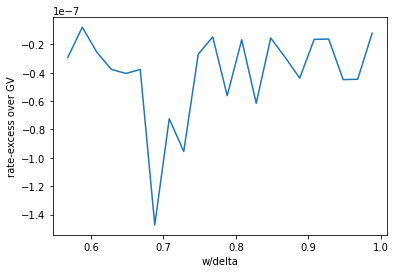

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import entropy


delta = 0.16                      # This program is a testbed for specific values of delta -- the next one iterates over different delta values
entdelta = entropy([delta,1-delta], base=2)      # H(\delta)


### The block below helps specify maximum and minimum values of w (the superposition codewords are chosen from balls of radius w)
### Specifically, w will be set at delta times a factor (with values from fac_data)
### The maximum value of w will be chosen to equal delta (hence max_fac = 1). The reason for this upper bound choice is purely numerical -- seems like choosing a higher value offers no advantage
### The minimum value of w will be chosen to equal the Plotkin value, satisfying the constraint 2w(1-w)=\delta (since no positive rate satelltie code can be supported if w is less than that)

max_fac = 1.0
min_fac = (1-np.sqrt(1-2*delta))/(2*delta)
step_size = 0.02

fac_data=np.arange(min_fac,max_fac,step_size)
y_data=np.arange(min_fac,max_fac,step_size)

i=0
for fac in fac_data:
  w = delta*fac_data[i]
  T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]   ## See comment on next row
  rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)   ## The weight-constrained GV rate is given by this formula -- see the first baseline calculation
  entw = entropy([w,1-w], base=2)
  x = cp.Variable(8,pos=True)

### The 8 entries of x correspond to the 8 entries of p_{XC'X'}. In particular, for i \in \{0,...,7}, let i = (a,b,c) in binary. Then x[i] denotes p_{XC'X'}(a,b,c)

  obj = cp.Maximize(cp.sum(cp.entr(x))/np.log(2))       ## As above, the worst-case joint distribution corresopnds to the maximizing H(X,C',X') satisfying constraints (below)
  constraints=[]
  constraints += [cp.sum(x) == 1]
  constraints += [x[1]+x[2]+x[5]+x[6] == w]             ## This denotes the constraint p_{XC'X'}(0,0,1) + p_{XC'X'}(0,1,0) + p_{XC'X'}(1,0,1) + p_{XC'X'}(1,1,0) = w, i.e., d_{H}(c',x') = nw, since x' is a satellite codeword of c'
  constraints += [x[4]+x[5]+x[6]+x[7] == w]             ## This denotes the constraint p_{XC'X'}(1,0,0) + p_{XC'X'}(1,0,1) + p_{XC'X'}(1,1,0) + p_{XC'X'}(1,1,1) = w, i.e., wt_{H}(x) = nw, since x is a satellite codeword of \underline{0}
  constraints += [x[1]+x[3]+x[4]+x[6] <= delta]         ## This denotes the constraint p_{XC'X'}(0,0,1) + p_{XC'X'}(0,1,1) + p_{XC'X'}(1,0,0) + p_{XC'X'}(1,1,0) \leq \delta, i.e., d_{H}(x,x') \leq n\delta, since x' in the Hamming ball of radius n\delta around x for "bad" types
  prob = cp.Problem(obj, constraints)
  prob.solve()
  y_data[i] = min(2*entw+entdelta-prob.value,rgv)       ## As noted above, the rate sustainable corresponds to the minimum of two quantities, corresponding to expurgation by another satellite codeword of the same cloud (the second term, rgv), and expurgation by a codeword of a different cloud (the first term)
  i = i+1

fac_datap = fac_data[1:len(fac_data)]
y_datap = y_data[1:len(y_data)]

fig = plt.figure()
plt.plot(fac_datap,y_datap, color='tab:blue')
plt.xlabel("w/delta")
plt.ylabel("rate-excess over GV")
plt.show()




The program below puts a wrapper around the code above, by iterating over values of $\delta$ from $0.001$ to $0.499$, and for each $\delta$ choosing the corresponding best value of $w$. With the current resolution (about 500 values of $\delta$, and step-size of about $0.01$ for values of $w$, takes about 5 minutes to run on Colab (maybe faster on a fast local PC/server -- be good to do a fine-grained simulation. Especially when there's another outer loop to further optimize over $R_{cloud}$).

delta =  0.001
rate excess over GV for this delta =  -3.741698968717788e-08
delta =  0.002
rate excess over GV for this delta =  -3.582086539194451e-08
delta =  0.003
rate excess over GV for this delta =  -1.0029394065247388e-08
delta =  0.004
rate excess over GV for this delta =  -1.6742804920255594e-09
delta =  0.005
rate excess over GV for this delta =  -1.366218763121374e-09
delta =  0.006
rate excess over GV for this delta =  -2.0339537831759458e-09
delta =  0.007
rate excess over GV for this delta =  -1.3292558442845603e-09
delta =  0.008
rate excess over GV for this delta =  -3.3583583691765284e-09
delta =  0.009
rate excess over GV for this delta =  -6.89858714597591e-09
delta =  0.01
rate excess over GV for this delta =  -8.655187039297019e-09
delta =  0.011
rate excess over GV for this delta =  -1.4275797322049755e-08
delta =  0.012
rate excess over GV for this delta =  -1.4836575301657717e-08
delta =  0.013
rate excess over GV for this delta =  -1.4299132877759746e-08
delta 

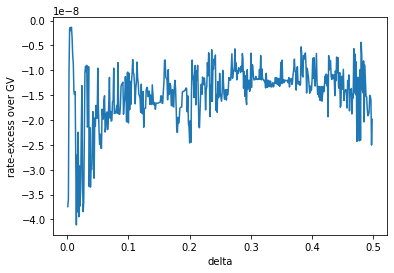

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import entropy


del_vals=[]
y_max=[]

for x in range(1, 499, 1):
  delta = x/1000
  print("delta = ", delta)
  del_vals.append(delta)
  entdelta = entropy([delta,1-delta], base=2)

  max_fac = 1.0
  min_fac = (1-np.sqrt(1-2*delta))/(2*delta)
  step_size = 0.01

  fac_data=np.arange(min_fac,max_fac,step_size)
  y_data=np.arange(min_fac,max_fac,step_size)

  i=0
  for fac in fac_data:
    w = delta*fac_data[i]
    T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]
    rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)
    entw = entropy([w,1-w], base=2)
    x = cp.Variable(8,pos=True)
    obj = cp.Maximize(cp.sum(cp.entr(x))/np.log(2))
    constraints=[]
    constraints += [cp.sum(x) == 1]
    constraints += [x[1]+x[2]+x[5]+x[6] == w]
    constraints += [x[4]+x[5]+x[6]+x[7] == w]
    constraints += [x[1]+x[3]+x[4]+x[6] <= delta]
    prob = cp.Problem(obj, constraints)
    prob.solve()
    y_data[i] = min(2*entw+entdelta-prob.value,rgv)
    i = i+1

  y_max.append(max(y_data))
  print("rate excess over GV for this delta = ", max(y_data))

fig = plt.figure()
plt.plot(del_vals,y_max, color='tab:blue')
plt.xlabel("delta")
plt.ylabel("rate-excess over GV")
plt.show()


In [ ]:
y_max

[0.0022273454749967003,
 0.003927764272069794,
 0.0054057876653455725,
 0.006790800352959828,
 0.008140676495592372,
 0.009426046634847751,
 0.010657304730603778,
 0.011776825714652286,
 0.012818098806727338,
 0.013815226678057332,
 0.014772814084512254,
 0.015694618993383758,
 0.01658376595063843,
 0.01744289332046095,
 0.01827425818376391,
 0.01911179580730976,
 0.01998353642504469,
 0.02083553585742437,
 0.021668842797808452,
 0.02248446053546832,
 0.023283116531087833,
 0.02406539515297107,
 0.024832161190541824,
 0.025583919653834775,
 0.026321239783053896,
 0.027044718676038915,
 0.02772328689185921,
 0.028337883614276194,
 0.028938729864037227,
 0.029526337783191692,
 0.030101184738656805,
 0.03066371671351642,
 0.031214351272490337,
 0.03175348016630103,
 0.032281471628214875,
 0.03279867240687351,
 0.03330540957217121,
 0.033801992124933955,
 0.034288712436323865,
 0.03476584753885109,
 0.03523366028762437,
 0.03569240040770716,
 0.036142305441195566,
 0.03658360160570889,
 0.

For future reference, putting these rate-excess values in text:
[0.0022273454749967003,
 0.003927764272069794,
 0.0054057876653455725,
 0.006790800352959828,
 0.008140676495592372,
 0.009426046634847751,
 0.010657304730603778,
 0.011776825714652286,
 0.012818098806727338,
 0.013815226678057332,
 0.014772814084512254,
 0.015694618993383758,
 0.01658376595063843,
 0.01744289332046095,
 0.01827425818376391,
 0.01911179580730976,
 0.01998353642504469,
 0.02083553585742437,
 0.021668842797808452,
 0.02248446053546832,
 0.023283116531087833,
 0.02406539515297107,
 0.024832161190541824,
 0.025583919653834775,
 0.026321239783053896,
 0.027044718676038915,
 0.02772328689185921,
 0.028337883614276194,
 0.028938729864037227,
 0.029526337783191692,
 0.030101184738656805,
 0.03066371671351642,
 0.031214351272490337,
 0.03175348016630103,
 0.032281471628214875,
 0.03279867240687351,
 0.03330540957217121,
 0.033801992124933955,
 0.034288712436323865,
 0.03476584753885109,
 0.03523366028762437,
 0.03569240040770716,
 0.036142305441195566,
 0.03658360160570889,
 0.03701650457440975,
 0.03744122018629059,
 0.03785794509434692,
 0.03826686735825946,
 0.03866816698739617,
 0.03906201643921636,
 0.03944858107756122,
 0.03982801959477067,
 0.04020048440112767,
 0.04056612198471815,
 0.040958509589615666,
 0.04136549519479582,
 0.04176567682651744,
 0.04215925348157534,
 0.042546211414321244,
 0.04292665039144217,
 0.043300769256411464,
 0.04366853861513176,
 0.04403004187863502,
 0.0443854609581773,
 0.04473475939386895,
 0.0450781210878165,
 0.045415522517009976,
 0.04574706148038554,
 0.04607286246481068,
 0.046392957330864126,
 0.04670727101917205,
 0.04701619940255419,
 0.04731948528527852,
 0.047617314763690244,
 0.04790981494964752,
 0.04819689102216129,
 0.048478729467749115,
 0.04875530132446171,
 0.049026710813401264,
 0.049292990821830474,
 0.04955422951377608,
 0.04981036574302378,
 0.05006158764546864,
 0.05030784524122045,
 0.050549226283572946,
 0.05078577492998049,
 0.051017542265566984,
 0.05124458742164806,
 0.051466883651885675,
 0.05168455610506095,
 0.051897567949150014,
 0.05210601280881133,
 0.05230990799795032,
 0.052509319509623786,
 0.0527041652315976,
 0.05289467973315953,
 0.053080855388504045,
 0.053262644009652194,
 0.053440088980765355,
 0.05361316480490341,
 0.05378217233501337,
 0.05394691483440095,
 0.05410738347516797,
 0.05426376817200351,
 0.05441603025439745,
 0.05456421749228757,
 0.05470832920582969,
 0.054848378220855976,
 0.05498452227708017,
 0.05511664092237445,
 0.055244836013237375,
 0.055369135883606146,
 0.055489537284303614,
 0.055606089239598866,
 0.055718811465186535,
 0.05582773438240274,
 0.05593290447191546,
 0.05603430925455766,
 0.056131999858639814,
 0.05622601995987808,
 0.0563163537634328,
 0.05640298827532875,
 0.056486024955190395,
 0.056565527285798556,
 0.0566414318748103,
 0.056713812097223926,
 0.056782670539169855,
 0.05684798776336453,
 0.0569098499033478,
 0.05696822406714097,
 0.05702319629876862,
 0.057074757894668204,
 0.057122911472079485,
 0.05716767816270285,
 0.05720911250826921,
 0.05724723223000616,
 0.057281979551966344,
 0.05731351441252208,
 0.057341752687975145,
 0.05736674359608762,
 0.0573885308705957,
 0.05740704759906512,
 0.057422417551455496,
 0.057434672302462575,
 0.0574436682367816,
 0.05744964137508135,
 0.05745244132760896,
 0.057452154531734356,
 0.05744876224746509,
 0.05744235122025332,
 0.05743284938004689,
 0.057420358464933985,
 0.0574048616256666,
 0.05738642410159622,
 0.05736496702546101,
 0.05734050762264564,
 0.05731315928439651,
 0.05728293792455075,
 0.057249745189543955,
 0.05721367516572151,
 0.05717474687475055,
 0.057132966653562045,
 0.057088273157382075,
 0.05704082299409596,
 0.056990656219803704,
 0.056937613897292794,
 0.056881757136239,
 0.056823178926737494,
 0.056761856681211365,
 0.056697837852910826,
 0.056631073143304844,
 0.05656160624716233,
 0.05648946539457489,
 0.05641465113866451,
 0.05633717521377135,
 0.056257068155796564,
 0.05617432764071095,
 0.05608898845895438,
 0.056001052459535794,
 0.05591053584931971,
 0.05581747452609864,
 0.05572184287676607,
 0.05562367390264722,
 0.05552298176386583,
 0.05541978055180952,
 0.055314084291233634,
 0.05520590694325955,
 0.05509526240620333,
 0.054982164517991094,
 0.054868430265251567,
 0.05481397358315365,
 0.05475796482073858,
 0.05470041367111378,
 0.054641329721408116,
 0.05458072245452961,
 0.05451860125089247,
 0.05445497539010269,
 0.05438985405261709,
 0.054323246321363206,
 0.054255161183331735,
 0.05418560753113422,
 0.05411459416453579,
 0.05404212979195355,
 0.05396822303192672,
 0.05389288241456214,
 0.053816116382949364,
 0.05373793329455134,
 0.05365834142256731,
 0.05357734895727151,
 0.05349496400732945,
 0.053411194601085565,
 0.05332604868783197,
 0.053239534139052136,
 0.05315165874964323,
 0.05306243023911805,
 0.05297185625278411,
 0.052879944362901554,
 0.05278670206982494,
 0.05269213680312168,
 0.05259625592267425,
 0.05249906671976157,
 0.05240057641812479,
 0.0523007921750136,
 0.052199721082217376,
 0.05209737016707705,
 0.05199374639348453,
 0.051888856662861915,
 0.05178270781512895,
 0.05167530662965425,
 0.0515666598261908,
 0.051456774065798516,
 0.051345655951754,
 0.051233312030444456,
 0.0511197487922479,
 0.05100497267240689,
 0.0508889900518783,
 0.05077180725818553,
 0.05065343056624494,
 0.050533866199190314,
 0.05041312032918288,
 0.050291199078208226,
 0.050168108518868104,
 0.05004385467515848,
 0.049896112980087004,
 0.0496642952652091,
 0.04943063937877268,
 0.049195158461729616,
 0.048957873896128046,
 0.048718782828695684,
 0.04847790625540194,
 0.048235257414454225,
 0.04799084958345601,
 0.04774469609001475,
 0.04749681030237385,
 0.04724719355288398,
 0.04699588406860489,
 0.0467428843171791,
 0.04648820750575888,
 0.04623186168493598,
 0.04597386524846714,
 0.04571423128578411,
 0.04545297356231437,
 0.04524180610398898,
 0.045101363720977394,
 0.04495993665333131,
 0.0448175297663973,
 0.04467414789405866,
 0.044529795839311825,
 0.04438447837483417,
 0.04423820024355618,
 0.044090966159221034,
 0.04394278080694791,
 0.043793648843790445,
 0.04364357489928716,
 0.043492563576018606,
 0.04334061945015488,
 0.0431877470720019,
 0.04303395096655094,
 0.042879235634016855,
 0.04272360555038457,
 0.04256706516794839,
 0.04240961891584938,
 0.04225127120061645,
 0.0420920264067044,
 0.04193188889702859,
 0.041770863013504966,
 0.04160895307758339,
 0.04144616339078677,
 0.04128249823524954,
 0.04111796187425143,
 0.04095255855275992,
 0.040786292497968724,
 0.04061916791983755,
 0.04045118901163658,
 0.04028235995049001,
 0.03999902760222085,
 0.03968115796864646,
 0.039362056119469635,
 0.03904177553571442,
 0.03872028938179595,
 0.03839769005625415,
 0.03807390841676961,
 0.03774898108175906,
 0.03742298093549001,
 0.03709587018630023,
 0.03676768301259381,
 0.036463067994116916,
 0.036292633560065735,
 0.03612145227317587,
 0.03594952790919992,
 0.03577686423618687,
 0.035603465015052294,
 0.03542933400015147,
 0.035254474939861336,
 0.03507889157716759,
 0.034902587650259775,
 0.03472556689313433,
 0.03454783303620679,
 0.03436938980692905,
 0.034190240930420446,
 0.03401039013010276,
 0.03382984112835086,
 0.03364859764714789,
 0.03346666340875415,
 0.033284042136390246,
 0.0331007375549246,
 0.032916753391577735,
 0.0327320933766404,
 0.03254676124420319,
 0.032360760732899285,
 0.032174095586664064,
 0.03187032016213376,
 0.031506485051310484,
 0.031142027384487125,
 0.030776921004720847,
 0.03041118073346949,
 0.030044922474365077,
 0.029678079721733308,
 0.029310701419208218,
 0.029052899441314173,
 0.028870105258357537,
 0.02868672581348397,
 0.02850276470809532,
 0.028318225557539378,
 0.02813311199204449,
 0.027947427657681212,
 0.02776117621734553,
 0.02757436135177027,
 0.02738698676056428,
 0.027199056163278446,
 0.02701057330049994,
 0.02682154193497821,
 0.02663196585278671,
 0.02644184886451173,
 0.026251194806478084,
 0.02606000754201543,
 0.02586829096275367,
 0.025676048989968336,
 0.02548328557595747,
 0.025097409931851278,
 0.02470697695284141,
 0.024316500625951143,
 0.023926033536503688,
 0.023535608967514055,
 0.02316397257587166,
 0.022978659758566833,
 0.022792888017216573,
 0.0226066612921918,
 0.022419983565236556,
 0.022232858861220173,
 0.022045291249960908,
 0.021857284848107783,
 0.021668843821088357,
 0.021479972385135992,
 0.02129067480937774,
 0.02110095541801371,
 0.020910818592567937,
 0.020720268774227613,
 0.02052931046627271,
 0.020337948236598402,
 0.020146186720334525,
 0.01977022860614186,
 0.019365465269301385,
 0.018961368898800846,
 0.018558001569505045,
 0.018255498349874166,
 0.01807278905021703,
 0.01788973584765685,
 0.017706343511167955,
 0.017522616893933973,
 0.017338560936809078,
 0.017154180671938857,
 0.01696948122652686,
 0.016784467826786775,
 0.016599145802050463,
 0.016413520589078967,
 0.01622759773656024,
 0.016041382909817603,
 0.015854881895741135,
 0.015495778758494616,
 0.015084992221527482,
 0.014675695063870009,
 0.014363569151916167,
 0.014187176409432123,
 0.014010546293387272,
 0.013833684867979423,
 0.013656598346631466,
 0.013479293098644929,
 0.013301775656210602,
 0.013124052721774637,
 0.012946131175802345,
 0.012768018084953647,
 0.012589720710703078,
 0.012411246518426067,
 0.012064840075896477,
 0.01165419516082622,
 0.011280605989183012,
 0.01111286835365699,
 0.01094499526378745,
 0.01077699458746273,
 0.010608874439793192,
 0.0104406431955395,
 0.010272309502284527,
 0.01010388229443171,
 0.009935370808068722,
 0.00976678459677549,
 0.009583349782099404,
 0.009175389090209318,
 0.008789532619996931,
 0.00863189390884811,
 0.008474222006956245,
 0.008316527284057296,
 0.008158820509967635,
 0.008001112877648042,
 0.007843416027937034,
 0.007685742076065205,
 0.007528103640140227,
 0.0072903906915851024,
 0.00689164364962469,
 0.006692843748250743,
 0.0065462798055886395,
 0.006399795928497598,
 0.0062534063097408055,
 0.006107125809567071,
 0.005960970000898458,
 0.0058149552183734965,
 0.005628191974173635,
 0.0052396395066658386,
 0.0050982496443925385,
 0.004963339333768246,
 0.0048286205730525555,
 0.004694112457296118,
 0.0045598351555506955,
 0.004425809996388752,
 0.004216631606754451,
 0.003937993267559392,
 0.0038147634007437148,
 0.0036918227873929954,
 0.003569195941944825,
 0.0034469089931838948,
 0.0033249898339688944,
 0.003072474228492439,
 0.002917866098598676,
 0.0028065624046706983,
 0.0026956730698901588,
 0.002585231622972195,
 0.0024752742474598577,
 0.0022361611392527347,
 0.002136104321620591,
 0.002036552018467974,
 0.0019375462630797369,
 0.0018391329747531326,
 0.001644638095431139,
 0.0015557749054859737,
 0.0014675340210008603,
 0.0013799713417503856,
 0.001233028530872815,
 0.0011410374891829278,
 0.001063389034837936,
 0.0009865331990532855,
 0.0008583398861679026,
 0.0007903024447104556,
 0.0007231268121166146,
 0.0006181304409618171,
 0.0005592351535927964,
 0.0005014685332911384,
 0.00041825500745629185,
 0.0003685656291925188,
 0.0003199931788666621,
 0.00025743418854085043,
 0.00021660726471095515,
 0.0001671665504641151,
 0.00013374471973626179,
 9.672420695427952e-05,
 6.60859135483971e-05,
 4.169743413195981e-05,
 2.3307430193630907e-05,
 1.0525698682650741e-05]

In [ ]:
del_vals

[0.001,
 0.002,
 0.003,
 0.004,
 0.005,
 0.006,
 0.007,
 0.008,
 0.009,
 0.01,
 0.011,
 0.012,
 0.013,
 0.014,
 0.015,
 0.016,
 0.017,
 0.018,
 0.019,
 0.02,
 0.021,
 0.022,
 0.023,
 0.024,
 0.025,
 0.026,
 0.027,
 0.028,
 0.029,
 0.03,
 0.031,
 0.032,
 0.033,
 0.034,
 0.035,
 0.036,
 0.037,
 0.038,
 0.039,
 0.04,
 0.041,
 0.042,
 0.043,
 0.044,
 0.045,
 0.046,
 0.047,
 0.048,
 0.049,
 0.05,
 0.051,
 0.052,
 0.053,
 0.054,
 0.055,
 0.056,
 0.057,
 0.058,
 0.059,
 0.06,
 0.061,
 0.062,
 0.063,
 0.064,
 0.065,
 0.066,
 0.067,
 0.068,
 0.069,
 0.07,
 0.071,
 0.072,
 0.073,
 0.074,
 0.075,
 0.076,
 0.077,
 0.078,
 0.079,
 0.08,
 0.081,
 0.082,
 0.083,
 0.084,
 0.085,
 0.086,
 0.087,
 0.088,
 0.089,
 0.09,
 0.091,
 0.092,
 0.093,
 0.094,
 0.095,
 0.096,
 0.097,
 0.098,
 0.099,
 0.1,
 0.101,
 0.102,
 0.103,
 0.104,
 0.105,
 0.106,
 0.107,
 0.108,
 0.109,
 0.11,
 0.111,
 0.112,
 0.113,
 0.114,
 0.115,
 0.116,
 0.117,
 0.118,
 0.119,
 0.12,
 0.121,
 0.122,
 0.123,
 0.124,
 0.125,
 0.126,
 0.12

In [ ]:
### Program to compute the second LP bound

import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import entropy
from scipy.optimize import minimize

del_vals=[]
lp2=[]

for i in range(1, 499, 1):
  delta = i/1000
#  print(delta)
  del_vals.append(delta)

  def rcw(xi,delta):
    if(delta <= 2*xi*(1-xi)):
      calc1 = 4*xi*(1-xi) - 2*delta +delta**2
      calc2 = (np.sqrt(calc1)-delta)**2
      calc3 = np.sqrt(1- calc2)
      calc4 = 0.5*(1-calc3)
      result = entropy([calc4,1-calc4],base=2)
    else:
      result = 0
    return result

  def objective(x):
    return 1-entropy([x,1-x],base=2) + rcw(x,delta)

  def constraint1(x):
    return x-delta/2

  def constraint2(x):
    return 0.5-x

  x0 = 0 #initial guess

  con1 = {'type': 'ineq', 'fun': constraint1}
  con2 = {'type': 'ineq', 'fun': constraint2}
  cons = ([con1,con2])

  solution = minimize(objective,x0,constraints = cons)

#  print(solution.fun)

  lp2.append(solution.fun)




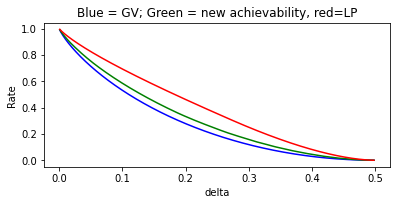

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import entropy

lp2 = [0.9937920401966766,
 0.9885754709549485,
 0.9837272931368716,
 0.9791197033881096,
 0.9746885680437317,
 0.9703972373202928,
 0.9662208228693541,
 0.9621428491793682,
 0.9581505698181926,
 0.9542339630269457,
 0.9503844986505339,
 0.9465964381093702,
 0.9428637774039316,
 0.9391826660432482,
 0.9355489103266081,
 0.931958667780211,
 0.9284100189785205,
 0.924899251818508,
 0.9214249993624192,
 0.9179845977472757,
 0.9145767855068966,
 0.9111991344433287,
 0.907850820122963,
 0.9045300524087843,
 0.9012358593666049,
 0.897966915450941,
 0.8947220768252003,
 0.8915005591256722,
 0.8883012928517496,
 0.8851235516409538,
 0.8819665827806952,
 0.8788293529427421,
 0.8757113567702705,
 0.8726121384305071,
 0.8695304063434011,
 0.8664663650684052,
 0.8634192235396313,
 0.8603884837985383,
 0.8573732730559966,
 0.854373823198859,
 0.8513890773252799,
 0.848418946698488,
 0.8454630370829866,
 0.8425208000396525,
 0.8395918706214371,
 0.8366759617687433,
 0.8337727995105487,
 0.8308820774171443,
 0.8280038808388814,
 0.8251370649837418,
 0.8222822023532376,
 0.8194378482138214,
 0.8166050717250226,
 0.8137833998926245,
 0.8109714713059133,
 0.8081707547266771,
 0.8053793171465077,
 0.8025983472010788,
 0.7998268089579994,
 0.7970648924420699,
 0.7943125852553684,
 0.791568920545206,
 0.7888345326746962,
 0.7861086972149658,
 0.7833917380207186,
 0.7806830216004568,
 0.7779830768284559,
 0.7752911515639341,
 0.7726064923187161,
 0.7699303911962294,
 0.7672617642755055,
 0.7646008806560082,
 0.7619474395351805,
 0.7593016443646454,
 0.7566625188390249,
 0.7540307900544605,
 0.7514060690493933,
 0.7487882436227059,
 0.7461771840269719,
 0.7435727205593687,
 0.7409747933885852,
 0.7383834377591391,
 0.7357985524313102,
 0.7332195543483719,
 0.7306469470650238,
 0.7280804187315777,
 0.7255198777170534,
 0.7229652360623586,
 0.7204164096417578,
 0.7178733168267836,
 0.7153362267465313,
 0.7128042060920909,
 0.7102777379509198,
 0.7077567396554388,
 0.705241116373484,
 0.7027307684696291,
 0.7002258334225543,
 0.6977257066724479,
 0.6952307127406948,
 0.6927408758516073,
 0.6902557825349295,
 0.6877756059194202,
 0.6853002538440163,
 0.6828298495373715,
 0.6803639275849122,
 0.6779024744867556,
 0.6754462432391874,
 0.6729936087086218,
 0.6705457523643488,
 0.6681025339109562,
 0.6656633547926759,
 0.6632287527847609,
 0.6607981379390203,
 0.6583719667677892,
 0.6559496638414625,
 0.6535316068915802,
 0.6511176158983433,
 0.6487076573941201,
 0.6463016972146366,
 0.6438996974486084,
 0.6415009216267861,
 0.6391064130952571,
 0.636715688492418,
 0.6343287163307743,
 0.6319454770911811,
 0.6295659641116044,
 0.6271895546303583,
 0.6248170443482464,
 0.6224480578174757,
 0.6200827687962533,
 0.6177207496323718,
 0.6153618500246739,
 0.6130068103856001,
 0.6106546371931011,
 0.6083061374310419,
 0.6059607127201411,
 0.6036185154735985,
 0.6012798481634047,
 0.5989438074953519,
 0.596611376242044,
 0.5942819545186051,
 0.5919551665160305,
 0.5896320159926096,
 0.5873113476670824,
 0.58499382896458,
 0.5826792980739274,
 0.5803676875099779,
 0.5780590926905794,
 0.5757532024715455,
 0.5734500605488285,
 0.5711501635631852,
 0.568852412246805,
 0.5665575978998382,
 0.5642655525052985,
 0.5619762085927524,
 0.5596897745805275,
 0.5574055724943074,
 0.5551244238464536,
 0.552845258565215,
 0.5505689206574952,
 0.5482951425590233,
 0.5460242690194235,
 0.5437552868345907,
 0.5414888742217989,
 0.5392249543854856,
 0.5369634748042944,
 0.5347043973036418,
 0.532447867597354,
 0.5301933811038482,
 0.527955187420623,
 0.5256946237759866,
 0.5234441622628571,
 0.5212039454423856,
 0.5189741195082412,
 0.5167152320318656,
 0.51447674695871,
 0.5122404946113649,
 0.5100064744035826,
 0.5077739465265507,
 0.5055439723898376,
 0.5033160951654114,
 0.5010902963579751,
 0.4988665577831598,
 0.49664487246226585,
 0.4944252354174406,
 0.4922076357681783,
 0.48999207100003705,
 0.4877779276555001,
 0.4855661206839055,
 0.4833562439125394,
 0.48114828147682265,
 0.47894221837366807,
 0.4767380406092684,
 0.4745357353496761,
 0.47233529105823935,
 0.4701366976307957,
 0.4679399464273756,
 0.46574446672740755,
 0.46355115976645533,
 0.46135961339740705,
 0.45916981237136784,
 0.45698174182120294,
 0.45479538729637514,
 0.45261073477531966,
 0.45042777075918583,
 0.44824648225447944,
 0.4460668568071757,
 0.44388888257327996,
 0.44171254824013373,
 0.439537843112095,
 0.4373647570203914,
 0.4351925903422299,
 0.4330225205260253,
 0.4308540018220274,
 0.4286870206644856,
 0.4265215636635189,
 0.4243576176670366,
 0.42219516970321913,
 0.4200342070621443,
 0.41787472546480253,
 0.4157167194941366,
 0.41356017808600587,
 0.41140509644931517,
 0.4092514722330828,
 0.40709866093946656,
 0.40494769233320516,
 0.40279810465201293,
 0.4006498868215832,
 0.3985030284054397,
 0.396357519768316,
 0.39421335224840987,
 0.3920705183318018,
 0.3899290118366525,
 0.38778882795285263,
 0.38564996330430384,
 0.38351176158681527,
 0.3813752894940886,
 0.37924006706135605,
 0.37710608398286793,
 0.3749733302876123,
 0.37284179638514664,
 0.3707114728420581,
 0.36858235035073605,
 0.3664544190425756,
 0.3643276676955107,
 0.36220208014869115,
 0.3600776786408076,
 0.3579539113468334,
 0.3558316763239825,
 0.35371056034144344,
 0.35159055404753436,
 0.34947164833962874,
 0.34735383438474765,
 0.3452371034013681,
 0.34312144650773374,
 0.341006854266996,
 0.3388933163200987,
 0.3367808207982568,
 0.3346693535479219,
 0.3325588979823082,
 0.33044943465131876,
 0.32834094214986476,
 0.3262333990815894,
 0.32412678856144816,
 0.3220211043568746,
 0.3199164035670905,
 0.3178127554051349,
 0.31571017626973114,
 0.3136086103558437,
 0.31150726195406786,
 0.3094074995701783,
 0.3073082936610167,
 0.3052106956743742,
 0.3031147069488589,
 0.3010238655997332,
 0.29893689571945853,
 0.29685455577316705,
 0.2947771645386468,
 0.29270355350164673,
 0.29063455955725076,
 0.2885701276523858,
 0.28651023552689103,
 0.28445488294791066,
 0.2824045707047865,
 0.28035813038039253,
 0.2783163546079201,
 0.2762792321430899,
 0.274246762411646,
 0.2722189533906147,
 0.27019580985851077,
 0.2681773479558019,
 0.2661636112110545,
 0.2641545554037869,
 0.2621502392405856,
 0.26015068044638906,
 0.2581558975567384,
 0.25616590965325803,
 0.2541807362299208,
 0.2522003970742665,
 0.2502249122202197,
 0.2482543019189356,
 0.24628858659809463,
 0.24432778685609194,
 0.24237235177554844,
 0.24042135475969822,
 0.23847535440878617,
 0.23653436835420724,
 0.23459841539264317,
 0.23266751456613669,
 0.23074168565299347,
 0.22882094901579303,
 0.22690532537895522,
 0.22499483595459066,
 0.22308950549918868,
 0.22118935243215074,
 0.2192943979568605,
 0.21740466480369267,
 0.21552017588937195,
 0.21364095438354985,
 0.21176702357715818,
 0.20989840696207188,
 0.20803512824923642,
 0.20617721130510305,
 0.20432468020798306,
 0.20247755920077024,
 0.20063587277048003,
 0.19879964553639137,
 0.19696890237477796,
 0.1951436683086846,
 0.19332396858687154,
 0.19150982866369207,
 0.18970127418717994,
 0.18789833101517828,
 0.18610102521099503,
 0.18430938306154754,
 0.1825234310546221,
 0.1807431958978513,
 0.17896870452408348,
 0.17719998408528367,
 0.17543706195560155,
 0.17367996573819253,
 0.1719287232659008,
 0.17018336260871392,
 0.1684439120698846,
 0.16671040019019576,
 0.16498285575974725,
 0.16326130780744438,
 0.16154578561738836,
 0.15983631872344212,
 0.15813293691452687,
 0.1564356702406836,
 0.15474454901476348,
 0.15305960381785555,
 0.1513808654958835,
 0.14970836517596467,
 0.1480421342605733,
 0.1463822044315676,
 0.14472860766091264,
 0.1430813762088988,
 0.14144054262886793,
 0.1398061397742063,
 0.1381782008023107,
 0.13655675917568133,
 0.13494184867028924,
 0.13333350337834243,
 0.13173175771315213,
 0.13013664641560668,
 0.12854820455640392,
 0.12696646754345198,
 0.12539147112543364,
 0.12382325139875097,
 0.1222623055008465,
 0.1207077093226074,
 0.11916000260375662,
 0.117619222934655,
 0.1160854172064378,
 0.11455865647429705,
 0.11303893733887124,
 0.1115262990103577,
 0.11002078129046002,
 0.10852242439948911,
 0.10703126910327408,
 0.10554683390523652,
 0.10407016422753301,
 0.10260081630280678,
 0.1011388321614086,
 0.09968425428488507,
 0.09823712561506968,
 0.09679748956065033,
 0.09536539000705112,
 0.09394087132538564,
 0.09252397838270131,
 0.0911147565048132,
 0.08971325160479338,
 0.08831951008689139,
 0.0869340267135649,
 0.08555579424893903,
 0.08418550408983483,
 0.08282320635629112,
 0.08146894700139298,
 0.08012276755226322,
 0.07878471297696595,
 0.07745481336396379,
 0.07613312017454682,
 0.0748196855924743,
 0.0735145625110018,
 0.07221780505295815,
 0.07092946660125378,
 0.0696496020392293,
 0.06837826696681534,
 0.06711551770655912,
 0.06586141131394271,
 0.06461600559840647,
 0.06337935914291072,
 0.06215153131641497,
 0.060932582299150995,
 0.05972257309567984,
 0.058521565554663674,
 0.0573296223932656,
 0.05614680721613898,
 0.05497318453634825,
 0.05380881979950692,
 0.05265377940646309,
 0.05150813073690156,
 0.05037194218035973,
 0.0492452831524214,
 0.04812822413197023,
 0.04702083668424739,
 0.04592319349324716,
 0.044835368390517695,
 0.043757436388458644,
 0.04268947371512519,
 0.041631557847543965,
 0.04058376754885133,
 0.0395461829072045,
 0.03851888537493811,
 0.03750195781238617,
 0.03649548452869561,
 0.035499551329892916,
 0.03451424556705949,
 0.033539656185584105,
 0.03257587377921557,
 0.03162344227217202,
 0.0306814473442975,
 0.029750557805633796,
 0.028830871087894585,
 0.027922486076470167,
 0.027025503306176014,
 0.026140025051765204,
 0.02526615543921087,
 0.02440400068726702,
 0.02355366934486924,
 0.022715272560452977,
 0.02188892438330742,
 0.02107474198359576,
 0.020273040090501803,
 0.019483369677334012,
 0.01870642047625615,
 0.017942138659985393,
 0.017190657877670823,
 0.01645211528816383,
 0.01572665171785177,
 0.015014411864540295,
 0.014315544511928789,
 0.013630202698386185,
 0.012958544023105254,
 0.012300730863082724,
 0.011656930674578838,
 0.011027316291997923,
 0.010412066264850719,
 0.009811365260822555,
 0.009225404433152075,
 0.008654381889293707,
 0.00809850320961224,
 0.007557981996662419,
 0.007033040476305586,
 0.0065239102306473085,
 0.006030832978771546,
 0.005554061485919773,
 0.0050938605398664835,
 0.004650508165660811,
 0.004224296977275354,
 0.0038155357096574054,
 0.003424551098116005,
 0.00305169003912838,
 0.002697322173672208,
 0.002361843048289777,
 0.0020456779319266024,
 0.0017492865857852203,
 0.0014731692745732006,
 0.0012178745060737088,
 0.0009840092351788474,
 0.0007722527335161264,
 0.0005833760461596286,
 0.0004182706581456127,
 0.0002779931943387869,
 0.00016384115532023155,
 7.749787360537435e-05]

new = [0.9908195877375355,
 0.9831136929365687,
 0.9759417358204233,
 0.9691684400306815,
 0.9627259841617982,
 0.95651096629,
 0.9504848626985952,
 0.9445552809563454,
 0.9387297151194309,
 0.9330220907821462,
 0.9274208941681961,
 0.9219167091456121,
 0.91650169051285,
 0.9111692002358012,
 0.9059135480843872,
 0.9007617843990348,
 0.8957359170970042,
 0.8907766896783276,
 0.8858804299122227,
 0.8810439179936476,
 0.8762640813093722,
 0.8715380666441892,
 0.8668636141908783,
 0.8622383764704324,
 0.8576603082863836,
 0.8531276017538214,
 0.8486069677102073,
 0.844077290274621,
 0.8395868824026854,
 0.8351344799516155,
 0.8307189025957764,
 0.8263390457332368,
 0.8219938734033376,
 0.8176824120620823,
 0.8134037450892038,
 0.8091570079223926,
 0.8049413837316066,
 0.8007560995604834,
 0.7966004228734387,
 0.7924736584564362,
 0.7883751456272661,
 0.7843042557175887,
 0.7802603897944251,
 0.7762429765932584,
 0.7722514706387291,
 0.7682853505320841,
 0.7643441173872835,
 0.7604272933999501,
 0.75653442053535,
 0.7526650593232602,
 0.7488187877490532,
 0.74499520023157,
 0.7411939066794507,
 0.7374145316185261,
 0.7336901497288559,
 0.7300081247655127,
 0.7263465878884366,
 0.7227052876721292,
 0.719083775542136,
 0.7154817312369658,
 0.7118989476325548,
 0.7083350027364541,
 0.7047896000837008,
 0.7012625538261568,
 0.6977534712932556,
 0.6942621911922114,
 0.6907883553202846,
 0.6873317368411106,
 0.6838921452076542,
 0.6804693064306409,
 0.6770628483914021,
 0.6736728783227006,
 0.6702988584572999,
 0.6669407020571245,
 0.6635982708231505,
 0.660271211650224,
 0.6569594595862192,
 0.6536627408094797,
 0.6503809210074255,
 0.6471138006195576,
 0.6438612412199665,
 0.6406229607134954,
 0.6373989317218413,
 0.63418889398935,
 0.630992730045026,
 0.6278102836953496,
 0.6246414103779141,
 0.6214859781178876,
 0.6183437734494763,
 0.615214739040958,
 0.6120986596775877,
 0.6089954545641203,
 0.6059049704282802,
 0.6028271063871238,
 0.5997616170443144,
 0.5967085771636331,
 0.5936678226837834,
 0.5906391522472092,
 0.5876224592345579,
 0.5846175712156223,
 0.5816246450883458,
 0.5786433430509564,
 0.5756735180155297,
 0.5727152243602034,
 0.5697682905229521,
 0.5668326339517857,
 0.5639081261419173,
 0.5609946545213353,
 0.5580922537917106,
 0.5552006827578464,
 0.5523199247656776,
 0.5494498918108649,
 0.5465904664201765,
 0.5437415854520385,
 0.540903158460471,
 0.5380751076571396,
 0.5352573732146821,
 0.532449838198901,
 0.5296524510890824,
 0.5268651546725137,
 0.5240878339826239,
 0.5213203785279583,
 0.5185627939038607,
 0.5158150493223118,
 0.5130769886752139,
 0.5103485941396493,
 0.5076297785856491,
 0.5049204343067573,
 0.5022205605804715,
 0.49953003903915194,
 0.4968488715998013,
 0.494176966749705,
 0.4915142455849816,
 0.488860648975301,
 0.4862161524313795,
 0.4835806958472021,
 0.48095414479690946,
 0.47833658372062493,
 0.47572785412313834,
 0.47312793195323166,
 0.47053678875467875,
 0.46795428648125303,
 0.4653804788030905,
 0.4628153282074502,
 0.4602586229829976,
 0.4577105320253756,
 0.455170838770969,
 0.45263956441514597,
 0.45011662588899437,
 0.4476020465038528,
 0.44509569163257645,
 0.4425976013158648,
 0.44010769784992754,
 0.43762598644600137,
 0.4351523290191476,
 0.43268668437193347,
 0.4302291082524702,
 0.4277795596963514,
 0.4253378842222456,
 0.42290412052515536,
 0.4204782329581285,
 0.41806017389884076,
 0.4156498287395983,
 0.4132473015089926,
 0.41085258035505734,
 0.40846545509164467,
 0.40608593622681977,
 0.40371406678487076,
 0.40134977483696965,
 0.3989930591086913,
 0.39664382217668337,
 0.3943020602032775,
 0.39196775446828536,
 0.3896408591467181,
 0.38732134015721376,
 0.3850091827728458,
 0.3827043399503123,
 0.3804068022952296,
 0.3781165279973283,
 0.37583349012103995,
 0.3735576819300578,
 0.3712890356771923,
 0.36902754272156324,
 0.3667731760650096,
 0.36452590911676874,
 0.36228571568796564,
 0.36005256998715807,
 0.3578264466138753,
 0.3556073205538951,
 0.3533969703813542,
 0.35125527205174634,
 0.3491213583605637,
 0.3469952018669349,
 0.34487677543716555,
 0.34276605224020984,
 0.34066300574324493,
 0.33856760970732513,
 0.33647983818313876,
 0.334399665506839,
 0.3323270662959694,
 0.3302620154454652,
 0.32820448812374325,
 0.32615445976886315,
 0.32411190608476925,
 0.3220768030376071,
 0.32004912685211384,
 0.31802885400807945,
 0.31601596123687836,
 0.31401042551806735,
 0.31201222407605567,
 0.3100213343768333,
 0.30803773412476765,
 0.30606140125946046,
 0.30409231395266645,
 0.30213045060527166,
 0.30017578984432947,
 0.2982283105201514,
 0.29628799170345743,
 0.29435481268257746,
 0.2924287529607087,
 0.29050979225322127,
 0.2885979104850186,
 0.28669308778794533,
 0.28479530449824464,
 0.28290454115406327,
 0.28102077849300344,
 0.27914399744971974,
 0.2772741791535611,
 0.27541130492625887,
 0.2735553562796531,
 0.2717063149134654,
 0.26986416271311164,
 0.2680288817475547,
 0.26620045426719463,
 0.2643788627018058,
 0.26256408965849787,
 0.26075611791973263,
 0.25895493044135975,
 0.2571605103507002,
 0.2553728409446606,
 0.2535919056878808,
 0.25181768821092043,
 0.25005017230847504,
 0.24826701139447505,
 0.24640759548914482,
 0.2445541408347114,
 0.2427066391690198,
 0.24086509067156925,
 0.2390294714847787,
 0.2371997817962691,
 0.2353760142296154,
 0.2335581616393001,
 0.23174621711914822,
 0.22994017399082423,
 0.22814001372520099,
 0.22634575487089326,
 0.2245573803980957,
 0.2227748841955074,
 0.22099825517228922,
 0.2192274927558493,
 0.2174625912424425,
 0.21570354577561157,
 0.2140020519288437,
 0.21237872622748355,
 0.2107618407925822,
 0.2091513825345448,
 0.2075473384946327,
 0.20594969584382683,
 0.2043584418817106,
 0.2027735640353806,
 0.20119504985837022,
 0.19962288702960407,
 0.19805706335236828,
 0.19649756675329944,
 0.1949443852814028,
 0.19339750710708303,
 0.19185692052119807,
 0.1903226139341363,
 0.1887945758749061,
 0.18727279499025384,
 0.18575726004379667,
 0.18424795991517295,
 0.1827448835992178,
 0.18124802020515474,
 0.1797573589558037,
 0.1782728891868144,
 0.176794600345911,
 0.17532248199216094,
 0.17385652379526306,
 0.1723967155348468,
 0.17094304709980046,
 0.16949550848760886,
 0.16805408980371417,
 0.1666187812608938,
 0.165189573178658,
 0.16365279868696003,
 0.1620884101723793,
 0.16052969920890836,
 0.15897670590030766,
 0.15742939015110324,
 0.15588783121626748,
 0.1543519469251936,
 0.15282176098226696,
 0.15129733347096785,
 0.1497786139110936,
 0.14826562390377118,
 0.146782999561764,
 0.14544133695662176,
 0.14410569640182735,
 0.14277606953134314,
 0.14145244807797397,
 0.14013482387303,
 0.13882318884600886,
 0.13751753502429453,
 0.1362178545328775,
 0.1349241395940911,
 0.1336363825273712,
 0.1323545757490303,
 0.13107871177205588,
 0.12980878320592637,
 0.12854478275644787,
 0.12728670322561153,
 0.12603453751147142,
 0.1247882786080422,
 0.12354791960522415,
 0.12231345368874147,
 0.12108487414010716,
 0.11986217433661173,
 0.11864534775133373,
 0.11743438795317163,
 0.1162292886069034,
 0.11491359407989266,
 0.11354434506407196,
 0.11218096887819407,
 0.11082342964164094,
 0.1094717325394039,
 0.10812598392521,
 0.10678610782940257,
 0.10545214381692591,
 0.10423419446828408,
 0.10309768204381953,
 0.10196700436016282,
 0.1008421559750533,
 0.09972313154243695,
 0.09860992581281824,
 0.09750253363364692,
 0.09640094994973425,
 0.09530516980370318,
 0.09421518833647458,
 0.09313100078778735,
 0.09205260249675462,
 0.09097998890245662,
 0.0899131555445788,
 0.08885209806408134,
 0.08779681220391444,
 0.0867472938097793,
 0.0857035388309253,
 0.08466554332100373,
 0.0836333034389587,
 0.08241422067635895,
 0.08119684228215263,
 0.07998567466997097,
 0.07878076292413738,
 0.0775821328986025,
 0.07640852289267841,
 0.07542746101682352,
 0.07445215755672874,
 0.07348260930701456,
 0.07251881317342401,
 0.07156076617415419,
 0.07060846544126476,
 0.06966190822215002,
 0.06872109188108344,
 0.06778601390084416,
 0.06685667188441269,
 0.06593306355676132,
 0.06501518676672047,
 0.0641030394889407,
 0.06319661982594837,
 0.06229592601029865,
 0.061400956406833074,
 0.060327907498614164,
 0.05923216451966373,
 0.05814319358169695,
 0.057061050745949915,
 0.056085865130556356,
 0.05523656065846583,
 0.05439299368207828,
 0.05355516320795328,
 0.05272306838884666,
 0.05189670852685324,
 0.05107608307671341,
 0.05026119164927134,
 0.049452034015120105,
 0.04864861010841093,
 0.047850920030864774,
 0.047058964055978536,
 0.0462727426334435,
 0.045492256393792396,
 0.04454518430382581,
 0.04355244004834602,
 0.04256719142617915,
 0.04168511538168851,
 0.040944768974518486,
 0.04021017685516204,
 0.039481340338728854,
 0.038758260946686995,
 0.03804094041326633,
 0.03732938069222047,
 0.03662358396395071,
 0.035923552643028156,
 0.03522928938613479,
 0.03454079710044744,
 0.03385807895249704,
 0.033013375266436995,
 0.03211037563136343,
 0.03125037012941012,
 0.030602150474000056,
 0.029959725649760016,
 0.029323099553809073,
 0.02869227638442673,
 0.028067260653276915,
 0.027448057198379727,
 0.026834671197913162,
 0.02622710818488294,
 0.025625374062740347,
 0.02501469135566814,
 0.02418537924505182,
 0.023384064337398147,
 0.022816856729928392,
 0.022255502084715606,
 0.021700007435248025,
 0.021150380266796165,
 0.02060662853931039,
 0.020068760711990152,
 0.019536785769637688,
 0.0190107132509838,
 0.018410430098972586,
 0.017654973755092618,
 0.017105322526195232,
 0.01661376235371137,
 0.016128134518110016,
 0.015648450435924555,
 0.015174722241197092,
 0.014706962830529635,
 0.014245185911992642,
 0.013748499420822458,
 0.0130558600679348,
 0.01261621720378825,
 0.012188885345959966,
 0.011767574112996448,
 0.011352300269242388,
 0.010943081701936475,
 0.010539937506616526,
 0.01006746012586135,
 0.009531340704779345,
 0.009156445577962913,
 0.008787653487504543,
 0.008424986957102587,
 0.008068470172958087,
 0.007718129133407081,
 0.007242997756087721,
 0.006871578164167613,
 0.006549265567143081,
 0.006233168185013627,
 0.005923317890933477,
 0.005619749260425411,
 0.005192820928831665,
 0.004910743406250528,
 0.0046349634507283355,
 0.0043655216769332705,
 0.004102462632718518,
 0.003749110935690192,
 0.0035071785889246865,
 0.003271654978190819,
 0.0030425948198684605,
 0.0027599386405651183,
 0.00253801725137337,
 0.002336220427483937,
 0.0021409972038515246,
 0.0019002165352111078,
 0.0017253708670998957,
 0.0015571652805292935,
 0.0013569164181775895,
 0.001208545338982403,
 0.0010670789092669386,
 0.0009059408858885787,
 0.0007841016977939708,
 0.000669153547546375,
 0.0005459924357308354,
 0.000450336483667102,
 0.00035183939554328525,
 0.0002751334526532867,
 0.00020060074301886388,
 0.0001382218678868119,
 8.786416789274831e-05,
 4.9276096742989495e-05,
 2.206728978748629e-05]


i=0
gv = []
#new = []
for item in del_vals:
  gv.append(1-entropy([del_vals[i],1-del_vals[i]],base=2))
#  new.append(1-entropy([del_vals[i],1-del_vals[i]],base=2)+y_max[i])
  i=i+1

fig = plt.figure()
ax1 = fig.add_axes((0.1,0.4,0.8,0.5))
plt.plot(del_vals,gv, color='b')
plt.plot(del_vals,new, color='g')
plt.plot(del_vals,lp2, color='r')
ax1.set_title("Blue = GV; Green = new achievability, red=LP")
plt.xlabel("delta")
plt.ylabel("Rate")
plt.show()


In [ ]:
new

[0.9908195877375355,
 0.9831136929365687,
 0.9759417358204233,
 0.9691684400306815,
 0.9627259841617982,
 0.95651096629,
 0.9504848626985952,
 0.9445552809563454,
 0.9387297151194309,
 0.9330220907821462,
 0.9274208941681961,
 0.9219167091456121,
 0.91650169051285,
 0.9111692002358012,
 0.9059135480843872,
 0.9007617843990348,
 0.8957359170970042,
 0.8907766896783276,
 0.8858804299122227,
 0.8810439179936476,
 0.8762640813093722,
 0.8715380666441892,
 0.8668636141908783,
 0.8622383764704324,
 0.8576603082863836,
 0.8531276017538214,
 0.8486069677102073,
 0.844077290274621,
 0.8395868824026854,
 0.8351344799516155,
 0.8307189025957764,
 0.8263390457332368,
 0.8219938734033376,
 0.8176824120620823,
 0.8134037450892038,
 0.8091570079223926,
 0.8049413837316066,
 0.8007560995604834,
 0.7966004228734387,
 0.7924736584564362,
 0.7883751456272661,
 0.7843042557175887,
 0.7802603897944251,
 0.7762429765932584,
 0.7722514706387291,
 0.7682853505320841,
 0.7643441173872835,
 0.7604272933999501,


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import entropy
from scipy.optimize import fsolve
import cvxpy as cp

x = cp.Variable(8,pos=True)
obj = cp.Maximize(cp.sum(cp.entr(x))/np.log(2))

delta = 0.1
w = delta*1
beta = delta
entdelta = entropy([delta,1-delta], base=2)
entw = entropy([w,1-w], base=2)


constraints=[]
constraints += [cp.sum(x) == 1]
constraints += [x[1]+x[2]+x[5]+x[6] == w]
constraints += [x[4]+x[5]+x[6]+x[7] == w]
constraints += [x[1]+x[3]+x[4]+x[6] <= delta]
#constraints += [2*entdelta - (cp.entr(x[0]+x[1])+cp.entr(x[2]+x[3])+cp.entr(x[4]+x[5])+cp.entr(x[6]+x[7])/cp.log(2)) <= 0 ]


prob = cp.Problem(obj, constraints)

prob.solve()
print("\nThe optimal value is:", prob.value)
print('\nThe optimal solution is:')
xg = x.value
print(xg)

xgb = [xg[0]+xg[1],xg[2]+xg[3],xg[4]+xg[5],xg[6]+xg[7]]

#print(entropy(xgb,base=2)-2*entw)

print("delta",delta)
print("w",w)
print("rate excess over GV",2*entw+entdelta-prob.value)



The optimal value is: 1.4069868441202222

The optimal solution is:
[0.72899974 0.00899986 0.08100007 0.08100033 0.00899986 0.00900012
 0.00099996 0.08100007]
delta 0.1
w 0.1
rate excess over GV -6.335237867638455e-08


In the example above, $\delta = w = 0.1$.
Eyeballing it, the extremizing distribution is (ignoring quantization errors):

$$p_{X,C',X'}(0,0,0) = (1-\delta)^3 $$
$$p_{X,C',X'}(0,0,1) = (1-\delta)\delta^2 $$
$$p_{X,C',X'}(0,1,0) = (1-\delta)^2\delta $$
$$p_{X,C',X'}(0,1,1) = (1-\delta)^2\delta $$
$$p_{X,C',X'}(1,0,0) = (1-\delta)\delta^2 $$
$$p_{X,C',X'}(1,0,1) = (1-\delta)\delta^2 $$
$$p_{X,C',X'}(1,1,0) = \delta^3 $$
$$p_{X,C',X'}(1,1,1) = (1-\delta)^2\delta $$

Note that due to the strict concavity of the entropy function, this distribution has to be unique. Any way to exclude this via additional constraints, due perhaps due to other expurgations, will result in rate positivity.

Some interesting facts about the above distribution -- the induced extremizing $\underline{x}'$ has marginal $p_{X'}(1) = 2\delta(1-\delta)$, which means it corresponds to $\delta \ast \delta$ ($\delta$ convolved with itself), and the induced extremizing $\underline{c}'$ has marginal $p_{C'}(1) = 3(1-\delta)^2\delta+\delta^3$, which equals $\delta \ast \delta \ast \delta$.

This is a lot closer than one would expect ("on average") for an "average" $\underline{x}'$, especially if the cloud-rate is low -- one would expect that the weight of such an $\underline{x}'$ would equal the convolution of the weight of $\underline{c}'$ with $\delta$ (i.e, $\delta$ convolved with itself four times, rather than twice).

**Update 22nd Feb**

Here's what's going on with the current code construction/analysis. (As backed up by numerical simulations.)

Let's consider a general code construction with cloud codeword rate $R_c$, satellite codeword rate $R_s$, and cloud radius $nw$. Let us parametrize $R_c = 1-H(\alpha)$ for some appropriate $\alpha$.

In this case, the fractional forbidden region volume carved out by inter-cloud interference on the cloud centred at $\underline{c}$  is given by

$$\left ( \frac{2^{nH(C'|C)}}{2^{n}} 2^{nR_c} \right ) \left (\frac{2^{nH(X'|C,C')}}{2^{nH(w)}} 2^{nR_s}\right )\left (\frac{2^{nH(X|C,C',X')}}{2^{nH(w)}} \right )$$

The first term $\left ( \frac{2^{nH(C'|C)}}{2^{n}} 2^{nR_c} \right )$ corresponds to the number of cloud centres $\underline{c}'$ with conditional type $p_{C'|C}$ w.r.t. $\underline{c}$, the second term $\left (\frac{2^{nH(X'|C,C')}}{2^{nH(w)}} 2^{nR_s}\right )$ corresponds to the number of satellite codewords w.r.t. the cloud centre $\underline{c}'$ and the true cloud centre $\underline{c}$ with conditional type $p_{X'|C,X'}$, and the last term $\left (\frac{2^{nH(X|C,C',X')}}{2^{nH(w)}} \right )$ corresponds to the fractional volume carved out by such $\underline{x}'$ on the Hamming ball ${\cal B}_H(\underline{c},nw)$.

Since the cloud centres are uniformly distributed therefore $H(C)=1$, and that plus the chain rule implies $H(C'|C)+H(X'|C,C')+H(X|C,C',X') = H(C,X,C',X')-1$. Therefore the expression above becomes
$$\frac{2^{nH(X,C,C',X')}}{2^{n(1+H(\alpha)+2H(w))}} $$

By observation (aided by computer simulations) the maximizing (worst-case) probability distribution $p^*_{C,X,C',X'}$ forms a Markov chain of the form $p_{C}p_{X|C}p_{X'|X}p_{C'|X'}$, where $p_{C}$ is Bernoulli(1/2), $p_{X|C}$ corresponds to a BSC($w$), $p_{X'|X}$ corresponds to a BSC($\delta$), and $p_{C'|X'}$ corresponds to a BSC($w$). One can verify directly that this joint distribution satisfies all the constraints we've imposed thus far on the problem, i.e.:

* $p_{C}$ is uniform
* The joint type $T(\underline{x},\underline{c})$ is typical according to the satellite codeword generation process (including that $d_H(\underline{x},\underline{c}) = nw$
* The joint type $T(\underline{x}',\underline{c}')$ is also typical according to the satellite codeword generation process (including that $d_H(\underline{x}',\underline{c}') = nw$
* The distance $d_H(\underline{x},\underline{x}') = n\delta$

So, substituting this joint distribution into the expression thus far, we obtain

$$\frac{2^{nH(X,C,C',X')}}{2^{n(1+H(\alpha)+2H(w))}} = 2^{n(H(\delta)-H(\alpha))}.$$

Therefore a satellite codeword rate of $R_s = H(\alpha) - H(\delta)$ can be sustained if $\alpha \geq \delta$. The overall rate equals $R_s + R_c = 1-H(\alpha)+ H(\alpha) - H(\delta) = 1-H(\delta)$, which is the classical GV rate.

So that explains that. However, I think there's room for improvement. Here's why:

The extremizing distribution $p^*_{C,X,C',X'}$ is quite atypical w.r.t. the code-generation process, indicating that the number of satellite codewords $\underline{x}'$ actually obeying this distribution is small relative to the code-size, and hence can be expurgated without affecting the code rate. Need to think about how to do this in a principled manner. (Not just the $\underline{x}'$ precisely matching $p^*_{C,X,C',X'}$, but ones close to it as well. I think for any ${\underline c}'$, one decides to expurgate a corresponding satellite codeword $\underline{x'}(\underline{c}')$ if for some cloud centre ${\underline c}$ the joint type of the triple $\underline{c},\underline{c}',\underline{x}'$ is "sufficiently atypical". Need to think more about this.
